In [2]:
#import relevent libraries
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib as mlp
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
from scipy import stats
pd.options.display.precision = 4
pd.options.mode.chained_assignment = None  

# Machine learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import set_config
set_config(display="diagram")


%matplotlib inline


In [3]:
#read dataset

df = pd.read_csv("Car_Insurance_Claim.csv")

In [4]:
df.head(20)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
5,877557,40-64,female,majority,20-29y,high school,upper class,0.619127,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,930134,65+,male,majority,30y+,high school,upper class,0.492944,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,68366,40-64,female,majority,20-29y,university,working class,0.521815,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


In [5]:
# Understanding the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [15]:
# Group the categorical features

df_obj = df.select_dtypes(include = ['object']).columns
df_obj

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

In [16]:
# Get the number of categories for each categorical feature
for column in df_obj:
    print(column)
    print(df[column].value_counts())

AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64
GENDER
female    5010
male      4990
Name: GENDER, dtype: int64
RACE
majority    9012
minority     988
Name: RACE, dtype: int64
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64
EDUCATION
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64
VEHICLE_TYPE
sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64


In [17]:
# Filter the integer features

df_int = df.select_dtypes(include = ['int64']).columns
df_int

Index(['ID', 'POSTAL_CODE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'], dtype='object')

In [18]:
# Get the 'categories' inside integer-datatype features

for column in df_int:
    print(column)
    print(df[column].value_counts())

ID
569520    1
702473    1
426507    1
386239    1
454670    1
         ..
931908    1
672440    1
297005    1
559584    1
442696    1
Name: ID, Length: 10000, dtype: int64
POSTAL_CODE
10238    6940
32765    2456
92101     484
21217     120
Name: POSTAL_CODE, dtype: int64
SPEEDING_VIOLATIONS
0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: SPEEDING_VIOLATIONS, dtype: int64
DUIS
0    8118
1    1470
2     331
3      68
4      10
5       2
6       1
Name: DUIS, dtype: int64
PAST_ACCIDENTS
0     5584
1     1783
2     1104
3      646
4      366
5      232
6      144
7       61
8       41
9       19
10       9
11       7
12       2
14       1
15       1
Name: PAST_ACCIDENTS, dtype: int64


In [19]:
# turn the column names from uppercase to lowercase

df.columns = map(str.lower, df.columns)
df.columns


Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

In [20]:
# Specify the target and predictor variables

Y = df['outcome']
X = df.drop(['outcome', 'id'],axis=1)

In [23]:
# Split the dataset for training and evaluation purpose

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=.4, 
                                                random_state=100)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 1553 to 5640
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  6000 non-null   object 
 1   gender               6000 non-null   object 
 2   race                 6000 non-null   object 
 3   driving_experience   6000 non-null   object 
 4   education            6000 non-null   object 
 5   income               6000 non-null   object 
 6   credit_score         5403 non-null   float64
 7   vehicle_ownership    6000 non-null   float64
 8   vehicle_year         6000 non-null   object 
 9   married              6000 non-null   float64
 10  children             6000 non-null   float64
 11  postal_code          6000 non-null   int64  
 12  annual_mileage       5439 non-null   float64
 13  vehicle_type         6000 non-null   object 
 14  speeding_violations  6000 non-null   int64  
 15  duis                 6000 non-null 

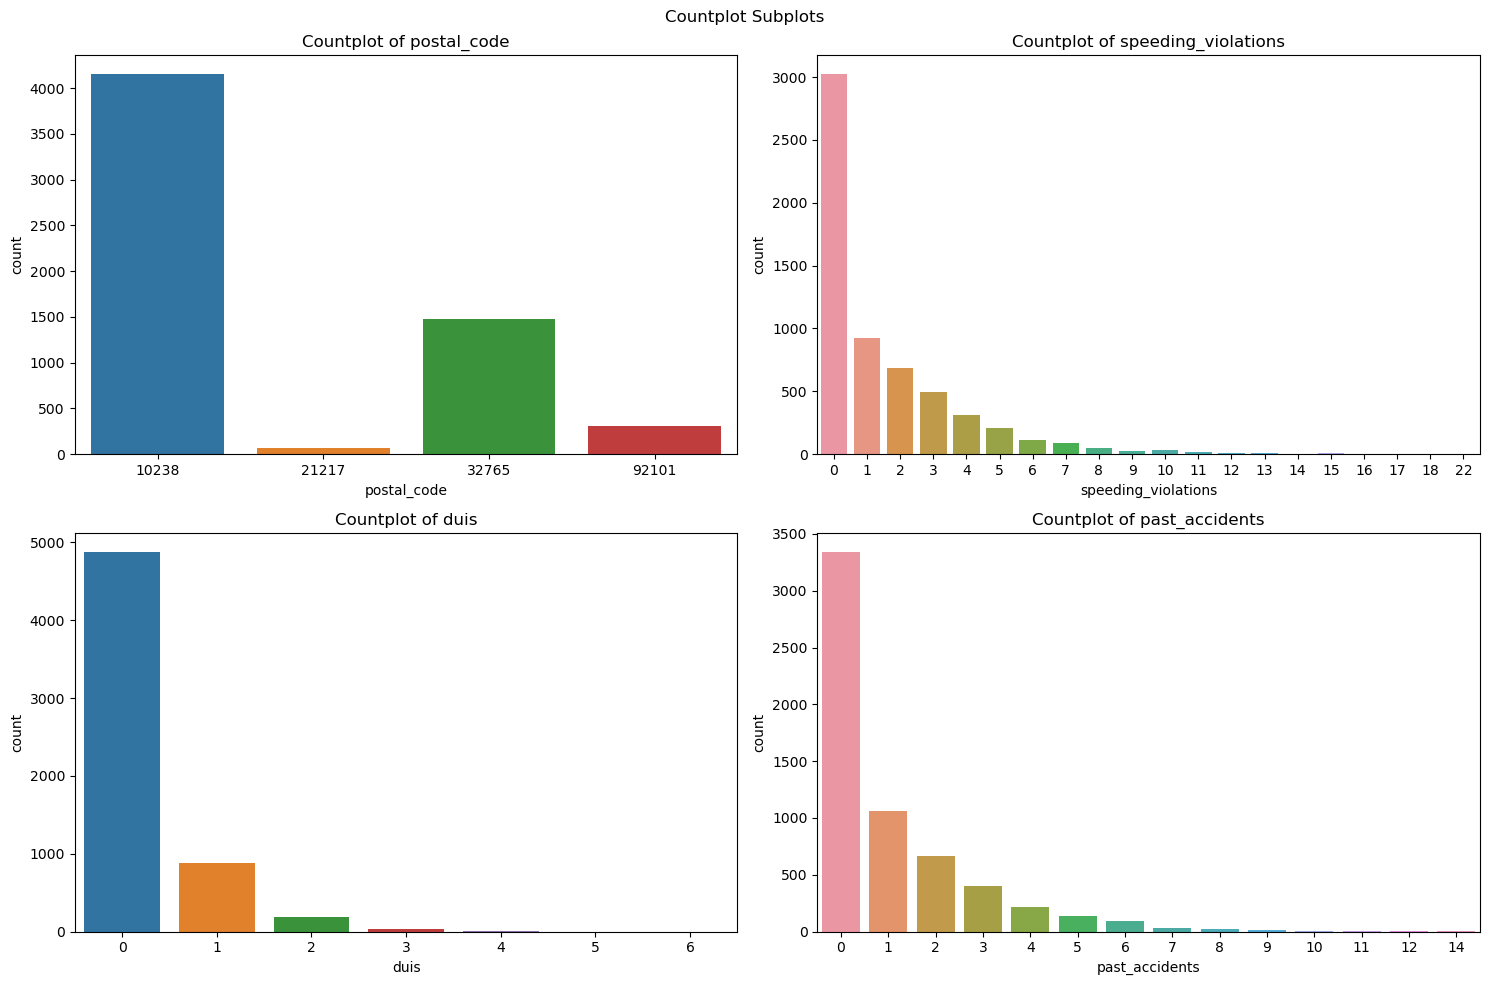

In [25]:
# Plot the categories of the integer-datatype features

X_num = X_train.select_dtypes(include = ['int64']).columns

# Calculate the number of rows and columns for the subplots grid
num_features = len(X_num)
num_cols = 2  # Number of columns
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Create countplot subplots for each feature
for i, feature in enumerate(X_num):
    row = i // num_cols  # Calculate the row index
    col = i % num_cols   # Calculate the column index
    ax = axes[row, col]  # Select the current axis

    sns.countplot(x=feature, data=X_train, ax=ax)
    ax.set_title(f"Countplot of {feature}")

# Remove any empty subplots if the number of features doesn't fill the grid
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Add a title to the entire figure
fig.suptitle("Countplot Subplots")

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

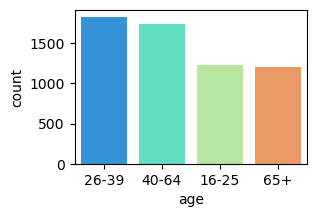

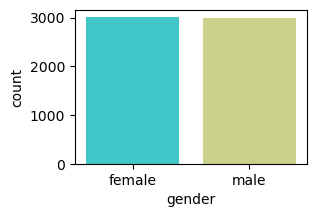

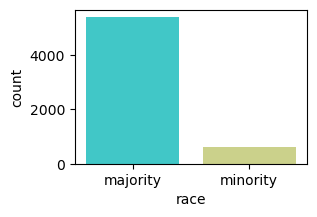

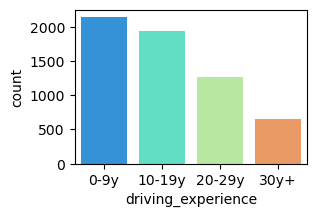

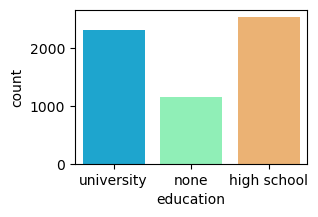

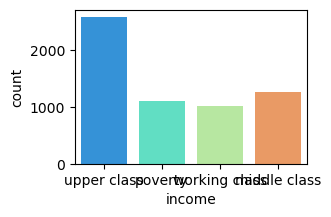

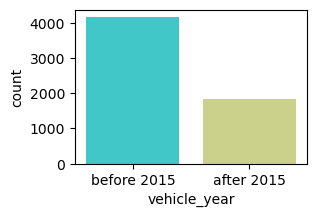

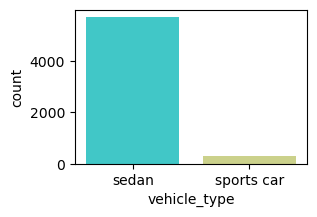

In [36]:
# Plot categories of the categorical features

X_cat = X_train.select_dtypes("object").columns  # axes is a numpy array of pyplot Axes
Xtrain_cat_i = X_train.select_dtypes(include = ["object"])

for col in X_cat:
    #Xtrain_cat_i = X_train.select_dtypes(include = ["object"])
    plt.figure(figsize=(3,2))
    sns.countplot(x=f'{col}',data=X_train, palette='rainbow')
    plt.show()

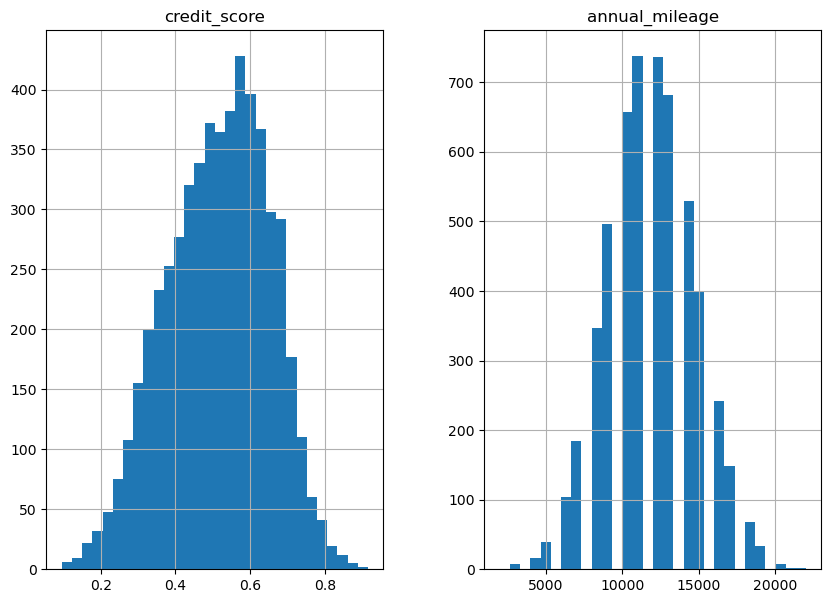

In [37]:
# Plot histogram for float-datatype features

X_float_i = X_train.select_dtypes(include = ['float64'])
X_float_i.hist(bins = 30,figsize=(10,7))
X_float = X_train.select_dtypes(include = ['float64']).columns


In [29]:
# We noticed that 'vehicle_ownership', 'children' and 'married' are classified as float. We convert them into integer.

X_train['vehicle_ownership'] = X_train['vehicle_ownership'].astype('int64')
X_train['children'] = X_train['children'].astype('int64')
X_train['married'] = X_train['married'].astype('int64')

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 1553 to 5640
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  6000 non-null   object 
 1   gender               6000 non-null   object 
 2   race                 6000 non-null   object 
 3   driving_experience   6000 non-null   object 
 4   education            6000 non-null   object 
 5   income               6000 non-null   object 
 6   credit_score         5403 non-null   float64
 7   vehicle_ownership    6000 non-null   int64  
 8   vehicle_year         6000 non-null   object 
 9   married              6000 non-null   int64  
 10  children             6000 non-null   int64  
 11  postal_code          6000 non-null   int64  
 12  annual_mileage       5439 non-null   float64
 13  vehicle_type         6000 non-null   object 
 14  speeding_violations  6000 non-null   int64  
 15  duis                 6000 non-null 

In [31]:
# Convert 'vehicle_ownership', 'children' and 'married' into integer for validation dataset

X_valid['vehicle_ownership'] = X_valid['vehicle_ownership'].astype('int64')
X_valid['children'] = X_valid['children'].astype('int64')
X_valid['married'] = X_valid['married'].astype('int64')

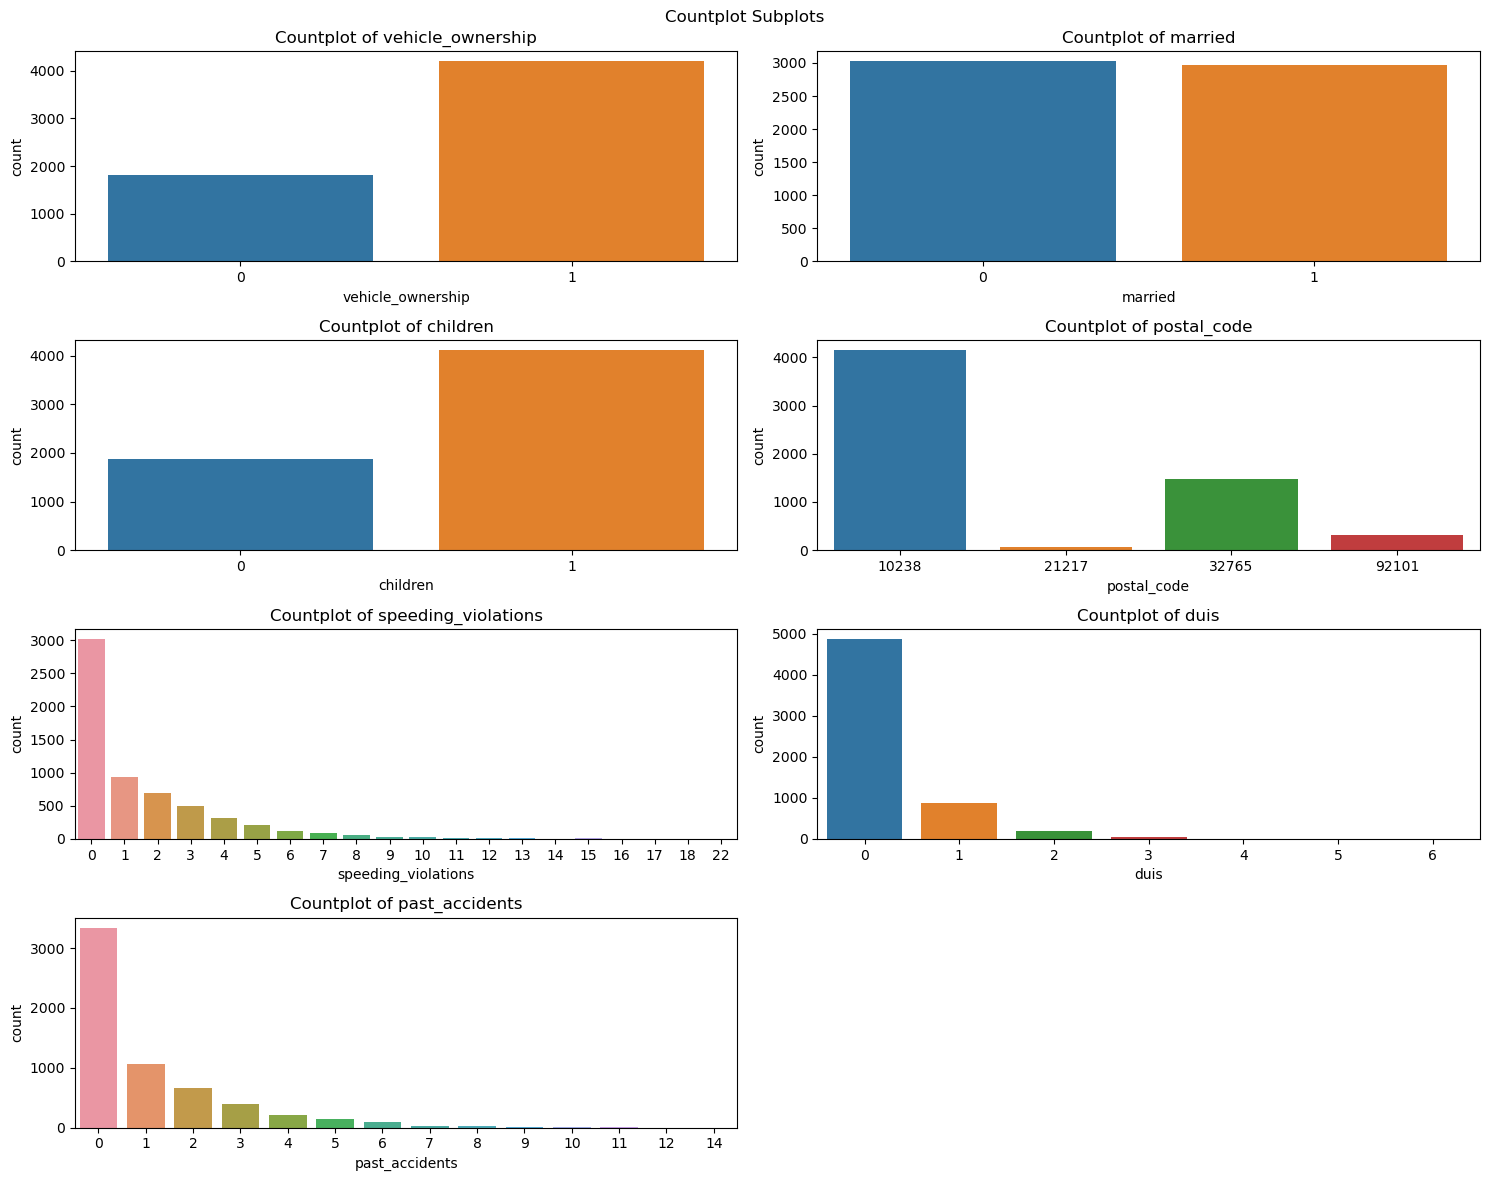

In [34]:
# Re-plot after conversion of few features have been converted

X_num = X_train.select_dtypes(include = ['int64']).columns


# Calculate the number of rows and columns for the subplots grid
num_features = len(X_num)
num_cols = 2  # Number of columns
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Create countplot subplots for each feature
for i, feature in enumerate(X_num):
    row = i // num_cols  # Calculate the row index
    col = i % num_cols   # Calculate the column index
    ax = axes[row, col]  # Select the current axis

    sns.countplot(x=feature, data=X_train, ax=ax)
    ax.set_title(f"Countplot of {feature}")

# Remove any empty subplots if the number of features doesn't fill the grid
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Add a title to the entire figure
fig.suptitle("Countplot Subplots")

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

<AxesSubplot:xlabel='outcome', ylabel='count'>

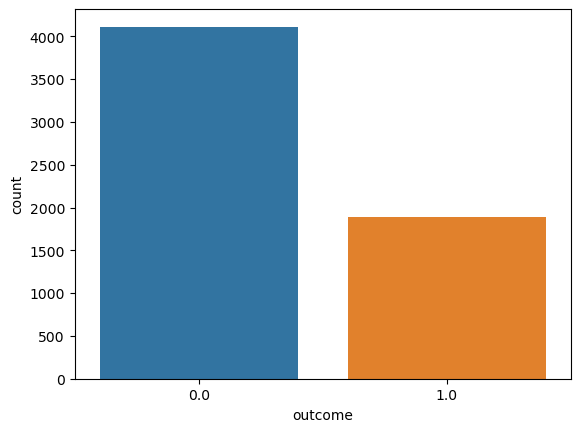

In [35]:
# Plot target variable

sns.countplot(x=y_train, data=y_train)


We want to preprocess the dataset. Since we have categorical and integer-type features, we decided to encode the data related to these features to allow machine learning algorithm works smoothly. We choose One Hot Encoding technique in this project.

In [40]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_selector as selector


int_transformer = Pipeline(
    steps = [("ohe", OneHotEncoder(handle_unknown = "infrequent_if_exist"))])

cat_transformer = Pipeline(
    steps = [("ohe", OneHotEncoder(handle_unknown = "infrequent_if_exist"))])

preprocessor = ColumnTransformer(
    transformers = [
        ("int", int_transformer, X_num),
        ("cat", cat_transformer, X_cat)   
    ])

In [41]:
# Display preprocessing pipeline

preprocessor

ColumnTransformer(transformers=[('int',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 Index(['vehicle_ownership', 'married', 'children', 'postal_code',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))])

For the base model, we implement Logistic Regression because of the simplicity

In [42]:
estimator = LogisticRegression()

steps = [
    ('preprocess', preprocessor),
    ('clf', estimator)
]

pipeline = Pipeline(steps)
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['vehicle_ownership', 'married', 'children', 'postal_code',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))])),
                ('clf', LogisticRegression())])

In [43]:
# Fit and run the prediction

pipeline.fit(X_train, y_train)
y_pred_lr = pipeline.predict(X_valid)
y_pred_lr

/Users/user/opt/anaconda3/envs/afifhusin/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0., 1., 0., ..., 0., 0., 1.])

In [44]:
# We assess the quality of classification by implementing the confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_valid, y_pred_lr)

array([[2494,  261],
       [ 326,  919]])

In [45]:
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_lr).ravel()

In [46]:
tn, fp, fn, tp

(2494, 261, 326, 919)

We have 2494 True Negative, 261 False Positive, 326 False Negative and 919 True Positive

In [47]:
# Try to implement xgboost classifier

import xgboost as xgb

In [48]:
estimator2 = xgb.XGBClassifier()

steps = [
    ('preprocess', preprocessor),
    ('clf', estimator2)
]

pipeline2 = Pipeline(steps)
pipeline2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['vehicle_ownership', 'married', 'children', 'postal_code',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exi...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [56]:
pipeline2.fit(X_train, y_train)
y_pred_xgb = pipeline2.predict(X_valid)
y_pred_xgb

array([0, 1, 0, ..., 0, 0, 1])

In [57]:
confusion_matrix(y_valid, y_pred_xgb, normalize='all')

array([[0.6045 , 0.08425],
       [0.075  , 0.23625]])

In [58]:
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_xgb).ravel()
tn, fp, fn, tp

(2418, 337, 300, 945)

In [54]:
# Run a classification report

from sklearn.metrics import classification_report
target_names = ['outcome 0', 'outcome 1']
print(classification_report(y_valid, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

   outcome 0       0.88      0.91      0.89      2755
   outcome 1       0.78      0.74      0.76      1245

    accuracy                           0.85      4000
   macro avg       0.83      0.82      0.83      4000
weighted avg       0.85      0.85      0.85      4000



In [59]:
print(classification_report(y_valid, y_pred_xgb, target_names=target_names))

              precision    recall  f1-score   support

   outcome 0       0.89      0.88      0.88      2755
   outcome 1       0.74      0.76      0.75      1245

    accuracy                           0.84      4000
   macro avg       0.81      0.82      0.82      4000
weighted avg       0.84      0.84      0.84      4000



In [61]:
# Try to implement catboost classifier

import catboost as cb

estimator3 = cb.CatBoostClassifier()

steps = [
    ('preprocess', preprocessor),
    ('clf', estimator3)
]

pipeline3 = Pipeline(steps)
pipeline3

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['vehicle_ownership', 'married', 'children', 'postal_code',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))])),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x7fa4bddb49d0>)])

In [62]:
pipeline3.fit(X_train, y_train)
y_pred_cb = pipeline3.predict(X_valid)
y_pred_cb

Learning rate set to 0.022141
0:	learn: 0.6724363	total: 52.3ms	remaining: 52.3s
1:	learn: 0.6559424	total: 55.2ms	remaining: 27.6s
2:	learn: 0.6390459	total: 57.7ms	remaining: 19.2s
3:	learn: 0.6191699	total: 60.2ms	remaining: 15s
4:	learn: 0.6045549	total: 62.9ms	remaining: 12.5s
5:	learn: 0.5905535	total: 65.6ms	remaining: 10.9s
6:	learn: 0.5779063	total: 68.2ms	remaining: 9.67s
7:	learn: 0.5661453	total: 70.7ms	remaining: 8.77s
8:	learn: 0.5536257	total: 73ms	remaining: 8.04s
9:	learn: 0.5412416	total: 75.5ms	remaining: 7.47s
10:	learn: 0.5298564	total: 77.7ms	remaining: 6.99s
11:	learn: 0.5187125	total: 79.9ms	remaining: 6.58s
12:	learn: 0.5068398	total: 82.6ms	remaining: 6.27s
13:	learn: 0.4984451	total: 84.9ms	remaining: 5.98s
14:	learn: 0.4916092	total: 87.1ms	remaining: 5.72s
15:	learn: 0.4851383	total: 89.3ms	remaining: 5.49s
16:	learn: 0.4776798	total: 91.6ms	remaining: 5.3s
17:	learn: 0.4697422	total: 94.1ms	remaining: 5.13s
18:	learn: 0.4635304	total: 97ms	remaining: 5.01s

203:	learn: 0.3112021	total: 613ms	remaining: 2.39s
204:	learn: 0.3110323	total: 616ms	remaining: 2.39s
205:	learn: 0.3109152	total: 618ms	remaining: 2.38s
206:	learn: 0.3107369	total: 620ms	remaining: 2.37s
207:	learn: 0.3106152	total: 623ms	remaining: 2.37s
208:	learn: 0.3104640	total: 625ms	remaining: 2.37s
209:	learn: 0.3103575	total: 628ms	remaining: 2.36s
210:	learn: 0.3101705	total: 633ms	remaining: 2.37s
211:	learn: 0.3100935	total: 635ms	remaining: 2.36s
212:	learn: 0.3100011	total: 636ms	remaining: 2.35s
213:	learn: 0.3097559	total: 639ms	remaining: 2.35s
214:	learn: 0.3096247	total: 641ms	remaining: 2.34s
215:	learn: 0.3094843	total: 643ms	remaining: 2.33s
216:	learn: 0.3093870	total: 645ms	remaining: 2.33s
217:	learn: 0.3092615	total: 647ms	remaining: 2.32s
218:	learn: 0.3091745	total: 649ms	remaining: 2.31s
219:	learn: 0.3090896	total: 651ms	remaining: 2.31s
220:	learn: 0.3089744	total: 653ms	remaining: 2.3s
221:	learn: 0.3089060	total: 655ms	remaining: 2.29s
222:	learn: 0

391:	learn: 0.2927666	total: 997ms	remaining: 1.54s
392:	learn: 0.2926462	total: 999ms	remaining: 1.54s
393:	learn: 0.2924575	total: 1s	remaining: 1.54s
394:	learn: 0.2923031	total: 1s	remaining: 1.54s
395:	learn: 0.2921132	total: 1.01s	remaining: 1.54s
396:	learn: 0.2919843	total: 1.01s	remaining: 1.53s
397:	learn: 0.2917344	total: 1.01s	remaining: 1.53s
398:	learn: 0.2916356	total: 1.01s	remaining: 1.53s
399:	learn: 0.2914898	total: 1.02s	remaining: 1.53s
400:	learn: 0.2914187	total: 1.02s	remaining: 1.53s
401:	learn: 0.2913823	total: 1.02s	remaining: 1.52s
402:	learn: 0.2912558	total: 1.03s	remaining: 1.52s
403:	learn: 0.2912239	total: 1.03s	remaining: 1.52s
404:	learn: 0.2911274	total: 1.03s	remaining: 1.52s
405:	learn: 0.2910128	total: 1.04s	remaining: 1.51s
406:	learn: 0.2908196	total: 1.04s	remaining: 1.51s
407:	learn: 0.2906222	total: 1.04s	remaining: 1.51s
408:	learn: 0.2904368	total: 1.04s	remaining: 1.51s
409:	learn: 0.2903134	total: 1.04s	remaining: 1.5s
410:	learn: 0.29018

639:	learn: 0.2718324	total: 1.58s	remaining: 888ms
640:	learn: 0.2717943	total: 1.58s	remaining: 886ms
641:	learn: 0.2717690	total: 1.58s	remaining: 883ms
642:	learn: 0.2717446	total: 1.58s	remaining: 880ms
643:	learn: 0.2716919	total: 1.59s	remaining: 878ms
644:	learn: 0.2716317	total: 1.59s	remaining: 875ms
645:	learn: 0.2716116	total: 1.59s	remaining: 872ms
646:	learn: 0.2715676	total: 1.59s	remaining: 870ms
647:	learn: 0.2715276	total: 1.6s	remaining: 867ms
648:	learn: 0.2715016	total: 1.6s	remaining: 864ms
649:	learn: 0.2714267	total: 1.6s	remaining: 861ms
650:	learn: 0.2713863	total: 1.6s	remaining: 859ms
651:	learn: 0.2712963	total: 1.6s	remaining: 856ms
652:	learn: 0.2712625	total: 1.6s	remaining: 853ms
653:	learn: 0.2712300	total: 1.61s	remaining: 850ms
654:	learn: 0.2711990	total: 1.61s	remaining: 847ms
655:	learn: 0.2711807	total: 1.61s	remaining: 845ms
656:	learn: 0.2711667	total: 1.61s	remaining: 842ms
657:	learn: 0.2711309	total: 1.61s	remaining: 839ms
658:	learn: 0.2710

825:	learn: 0.2619720	total: 1.97s	remaining: 414ms
826:	learn: 0.2619145	total: 1.97s	remaining: 412ms
827:	learn: 0.2618562	total: 1.97s	remaining: 409ms
828:	learn: 0.2617894	total: 1.97s	remaining: 407ms
829:	learn: 0.2616867	total: 1.97s	remaining: 405ms
830:	learn: 0.2616532	total: 1.98s	remaining: 402ms
831:	learn: 0.2616076	total: 1.98s	remaining: 400ms
832:	learn: 0.2615881	total: 1.98s	remaining: 397ms
833:	learn: 0.2615581	total: 1.98s	remaining: 395ms
834:	learn: 0.2615467	total: 1.98s	remaining: 392ms
835:	learn: 0.2614640	total: 1.99s	remaining: 390ms
836:	learn: 0.2614007	total: 1.99s	remaining: 388ms
837:	learn: 0.2613666	total: 1.99s	remaining: 385ms
838:	learn: 0.2613642	total: 1.99s	remaining: 383ms
839:	learn: 0.2612163	total: 2s	remaining: 380ms
840:	learn: 0.2611653	total: 2s	remaining: 378ms
841:	learn: 0.2610997	total: 2s	remaining: 375ms
842:	learn: 0.2610402	total: 2s	remaining: 373ms
843:	learn: 0.2608836	total: 2.01s	remaining: 371ms
844:	learn: 0.2608034	to

998:	learn: 0.2535686	total: 2.35s	remaining: 2.35ms
999:	learn: 0.2534848	total: 2.35s	remaining: 0us


array([0., 1., 0., ..., 0., 0., 1.])

In [64]:
confusion_matrix(y_valid, y_pred_cb, normalize='all')
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_cb).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_valid, y_pred_cb, target_names=target_names))

2447 308 311 934
              precision    recall  f1-score   support

   outcome 0       0.89      0.89      0.89      2755
   outcome 1       0.75      0.75      0.75      1245

    accuracy                           0.85      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.85      0.85      0.85      4000



# Just noticed that annualmileage and creditscore have missing values. Let's see if it will improve the score

In [66]:
int_transformer = Pipeline(
    steps = [("ohe", OneHotEncoder(handle_unknown = "infrequent_if_exist"))])

flt_transformer = Pipeline(
    steps = [("imputer", SimpleImputer(strategy = 'median'))]
)
cat_transformer = Pipeline(
    steps = [("ohe", OneHotEncoder(handle_unknown = "infrequent_if_exist"))])

preprocessor = ColumnTransformer(
    transformers = [
        ("int", int_transformer, X_num),
        ("flt", flt_transformer, X_float),
        ("cat", cat_transformer, X_cat)   
    ])
preprocessor

ColumnTransformer(transformers=[('int',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 Index(['vehicle_ownership', 'married', 'children', 'postal_code',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')),
                                ('flt',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['credit_score', 'annual_mileage'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))])

In [69]:
estimator = LogisticRegression()

steps = [
    ('preprocess', preprocessor),
    ('clf', estimator)
]

pipeline = Pipeline(steps)
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['vehicle_ownership', 'married', 'children', 'postal_code',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')),
                                                 ('flt',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['credit_score', 'annual_mileage'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))])),
                ('clf', LogisticRegression())])

In [71]:
pipeline.fit(X_train, y_train)
y_pred_lr2 = pipeline.predict(X_valid)

confusion_matrix(y_valid, y_pred_lr2, normalize='all')
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_lr2).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_valid, y_pred_lr2, target_names=target_names))

2480 275 471 774
              precision    recall  f1-score   support

   outcome 0       0.84      0.90      0.87      2755
   outcome 1       0.74      0.62      0.67      1245

    accuracy                           0.81      4000
   macro avg       0.79      0.76      0.77      4000
weighted avg       0.81      0.81      0.81      4000



In [72]:
print(classification_report(y_valid, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

   outcome 0       0.88      0.91      0.89      2755
   outcome 1       0.78      0.74      0.76      1245

    accuracy                           0.85      4000
   macro avg       0.83      0.82      0.83      4000
weighted avg       0.85      0.85      0.85      4000



In [73]:
steps = [
    ('preprocess', preprocessor),
    ('clf', estimator2)
]

pipeline2 = Pipeline(steps)
pipeline2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['vehicle_ownership', 'married', 'children', 'postal_code',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')),
                                                 ('flt',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index([...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [78]:
pipeline2.fit(X_train, y_train)
y_pred_xgb2 = pipeline2.predict(X_valid)

confusion_matrix(y_valid, y_pred_xgb2, normalize='all')
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_xgb2).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_valid, y_pred_xgb2, target_names=target_names))

2415 340 311 934
              precision    recall  f1-score   support

   outcome 0       0.89      0.88      0.88      2755
   outcome 1       0.73      0.75      0.74      1245

    accuracy                           0.84      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.84      0.84      0.84      4000



In [76]:
print(classification_report(y_valid, y_pred_xgb, target_names=target_names))

              precision    recall  f1-score   support

   outcome 0       0.89      0.88      0.88      2755
   outcome 1       0.74      0.76      0.75      1245

    accuracy                           0.84      4000
   macro avg       0.81      0.82      0.82      4000
weighted avg       0.84      0.84      0.84      4000



In [77]:
steps = [
    ('preprocess', preprocessor),
    ('clf', estimator3)
]

pipeline3 = Pipeline(steps)
pipeline3

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('int',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['vehicle_ownership', 'married', 'children', 'postal_code',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')),
                                                 ('flt',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['credit_score', 'annual_mileage'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object'))])),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x7fa4bddb49d0>)])

In [79]:
pipeline3.fit(X_train, y_train)
y_pred_cb2 = pipeline3.predict(X_valid)

confusion_matrix(y_valid, y_pred_cb2, normalize='all')
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_cb2).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_valid, y_pred_cb2, target_names=target_names))

Learning rate set to 0.022141
0:	learn: 0.6711808	total: 3.21ms	remaining: 3.2s
1:	learn: 0.6520376	total: 5.57ms	remaining: 2.78s
2:	learn: 0.6318796	total: 8.61ms	remaining: 2.86s
3:	learn: 0.6174827	total: 12.3ms	remaining: 3.05s
4:	learn: 0.6011977	total: 16.1ms	remaining: 3.2s
5:	learn: 0.5881311	total: 18.1ms	remaining: 3s
6:	learn: 0.5739052	total: 20.5ms	remaining: 2.91s
7:	learn: 0.5602774	total: 24.4ms	remaining: 3.02s
8:	learn: 0.5501946	total: 26.4ms	remaining: 2.91s
9:	learn: 0.5394749	total: 28.3ms	remaining: 2.8s
10:	learn: 0.5309173	total: 30.2ms	remaining: 2.72s
11:	learn: 0.5218990	total: 32.3ms	remaining: 2.66s
12:	learn: 0.5132726	total: 34.7ms	remaining: 2.63s
13:	learn: 0.5028115	total: 37.7ms	remaining: 2.65s
14:	learn: 0.4952675	total: 40ms	remaining: 2.63s
15:	learn: 0.4867515	total: 42.4ms	remaining: 2.61s
16:	learn: 0.4779973	total: 45.7ms	remaining: 2.64s
17:	learn: 0.4721707	total: 48ms	remaining: 2.62s
18:	learn: 0.4665133	total: 50.3ms	remaining: 2.6s
19:

172:	learn: 0.3114635	total: 385ms	remaining: 1.84s
173:	learn: 0.3112868	total: 388ms	remaining: 1.84s
174:	learn: 0.3111700	total: 390ms	remaining: 1.84s
175:	learn: 0.3109545	total: 392ms	remaining: 1.84s
176:	learn: 0.3108213	total: 394ms	remaining: 1.83s
177:	learn: 0.3106844	total: 397ms	remaining: 1.83s
178:	learn: 0.3105261	total: 399ms	remaining: 1.83s
179:	learn: 0.3103503	total: 402ms	remaining: 1.83s
180:	learn: 0.3101672	total: 404ms	remaining: 1.83s
181:	learn: 0.3100142	total: 407ms	remaining: 1.83s
182:	learn: 0.3098564	total: 409ms	remaining: 1.83s
183:	learn: 0.3097151	total: 413ms	remaining: 1.83s
184:	learn: 0.3096140	total: 415ms	remaining: 1.83s
185:	learn: 0.3093433	total: 418ms	remaining: 1.83s
186:	learn: 0.3091730	total: 420ms	remaining: 1.83s
187:	learn: 0.3090200	total: 422ms	remaining: 1.82s
188:	learn: 0.3089768	total: 425ms	remaining: 1.82s
189:	learn: 0.3088074	total: 427ms	remaining: 1.82s
190:	learn: 0.3087176	total: 429ms	remaining: 1.82s
191:	learn: 

342:	learn: 0.2893271	total: 770ms	remaining: 1.47s
343:	learn: 0.2892542	total: 772ms	remaining: 1.47s
344:	learn: 0.2890673	total: 774ms	remaining: 1.47s
345:	learn: 0.2889237	total: 776ms	remaining: 1.47s
346:	learn: 0.2888515	total: 779ms	remaining: 1.47s
347:	learn: 0.2888073	total: 781ms	remaining: 1.46s
348:	learn: 0.2887222	total: 785ms	remaining: 1.46s
349:	learn: 0.2886560	total: 787ms	remaining: 1.46s
350:	learn: 0.2885552	total: 789ms	remaining: 1.46s
351:	learn: 0.2884521	total: 790ms	remaining: 1.46s
352:	learn: 0.2882979	total: 792ms	remaining: 1.45s
353:	learn: 0.2881718	total: 794ms	remaining: 1.45s
354:	learn: 0.2880743	total: 796ms	remaining: 1.45s
355:	learn: 0.2879559	total: 798ms	remaining: 1.44s
356:	learn: 0.2878710	total: 800ms	remaining: 1.44s
357:	learn: 0.2876839	total: 802ms	remaining: 1.44s
358:	learn: 0.2876095	total: 804ms	remaining: 1.44s
359:	learn: 0.2874889	total: 806ms	remaining: 1.43s
360:	learn: 0.2874397	total: 808ms	remaining: 1.43s
361:	learn: 

508:	learn: 0.2717451	total: 1.17s	remaining: 1.13s
509:	learn: 0.2716335	total: 1.17s	remaining: 1.13s
510:	learn: 0.2715227	total: 1.19s	remaining: 1.14s
511:	learn: 0.2714092	total: 1.19s	remaining: 1.14s
512:	learn: 0.2713101	total: 1.2s	remaining: 1.14s
513:	learn: 0.2711642	total: 1.2s	remaining: 1.13s
514:	learn: 0.2710232	total: 1.2s	remaining: 1.13s
515:	learn: 0.2709517	total: 1.21s	remaining: 1.13s
516:	learn: 0.2708804	total: 1.21s	remaining: 1.13s
517:	learn: 0.2707698	total: 1.21s	remaining: 1.13s
518:	learn: 0.2706602	total: 1.22s	remaining: 1.13s
519:	learn: 0.2705751	total: 1.22s	remaining: 1.12s
520:	learn: 0.2705122	total: 1.22s	remaining: 1.12s
521:	learn: 0.2703984	total: 1.22s	remaining: 1.12s
522:	learn: 0.2703135	total: 1.23s	remaining: 1.12s
523:	learn: 0.2702213	total: 1.23s	remaining: 1.12s
524:	learn: 0.2701182	total: 1.23s	remaining: 1.11s
525:	learn: 0.2700076	total: 1.24s	remaining: 1.11s
526:	learn: 0.2698863	total: 1.24s	remaining: 1.11s
527:	learn: 0.2

730:	learn: 0.2510319	total: 1.75s	remaining: 643ms
731:	learn: 0.2509335	total: 1.75s	remaining: 640ms
732:	learn: 0.2508360	total: 1.75s	remaining: 638ms
733:	learn: 0.2508103	total: 1.75s	remaining: 636ms
734:	learn: 0.2507811	total: 1.76s	remaining: 633ms
735:	learn: 0.2506918	total: 1.76s	remaining: 631ms
736:	learn: 0.2506531	total: 1.76s	remaining: 628ms
737:	learn: 0.2505032	total: 1.76s	remaining: 626ms
738:	learn: 0.2504562	total: 1.76s	remaining: 623ms
739:	learn: 0.2503572	total: 1.77s	remaining: 621ms
740:	learn: 0.2502359	total: 1.77s	remaining: 618ms
741:	learn: 0.2501531	total: 1.77s	remaining: 616ms
742:	learn: 0.2500909	total: 1.77s	remaining: 613ms
743:	learn: 0.2500241	total: 1.77s	remaining: 611ms
744:	learn: 0.2499867	total: 1.78s	remaining: 608ms
745:	learn: 0.2498161	total: 1.78s	remaining: 606ms
746:	learn: 0.2497782	total: 1.78s	remaining: 603ms
747:	learn: 0.2496493	total: 1.78s	remaining: 601ms
748:	learn: 0.2495457	total: 1.78s	remaining: 598ms
749:	learn: 

889:	learn: 0.2393515	total: 2.14s	remaining: 264ms
890:	learn: 0.2392687	total: 2.14s	remaining: 262ms
891:	learn: 0.2391322	total: 2.14s	remaining: 259ms
892:	learn: 0.2390335	total: 2.14s	remaining: 257ms
893:	learn: 0.2389659	total: 2.15s	remaining: 255ms
894:	learn: 0.2388996	total: 2.15s	remaining: 252ms
895:	learn: 0.2388364	total: 2.15s	remaining: 250ms
896:	learn: 0.2388042	total: 2.15s	remaining: 247ms
897:	learn: 0.2387030	total: 2.15s	remaining: 245ms
898:	learn: 0.2386501	total: 2.16s	remaining: 242ms
899:	learn: 0.2385821	total: 2.16s	remaining: 240ms
900:	learn: 0.2385309	total: 2.16s	remaining: 238ms
901:	learn: 0.2384367	total: 2.17s	remaining: 235ms
902:	learn: 0.2383509	total: 2.17s	remaining: 233ms
903:	learn: 0.2382654	total: 2.17s	remaining: 231ms
904:	learn: 0.2382141	total: 2.17s	remaining: 228ms
905:	learn: 0.2381326	total: 2.17s	remaining: 226ms
906:	learn: 0.2380950	total: 2.18s	remaining: 223ms
907:	learn: 0.2380301	total: 2.18s	remaining: 221ms
908:	learn: 

In [80]:
print(classification_report(y_valid, y_pred_cb, target_names=target_names))

              precision    recall  f1-score   support

   outcome 0       0.89      0.89      0.89      2755
   outcome 1       0.75      0.75      0.75      1245

    accuracy                           0.85      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.85      0.85      0.85      4000



In [94]:
#Implementing cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Define the number of folds for cross-validation
n_folds = 5

# Initialize the cross-validation object (e.g., using StratifiedKFold for classification)
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(pipeline3, X_train, y_train, cv=kf, scoring='accuracy')

# Display the cross-validation results
print(f"Cross-Validation Results (Accuracy):")
print(f"Individual fold scores: {scores}")
print(f"Mean accuracy: {scores.mean():.2f}")
print(f"Standard deviation: {scores.std():.2f}")

Learning rate set to 0.020129
0:	learn: 0.6766286	total: 2.2ms	remaining: 2.2s
1:	learn: 0.6620860	total: 4.03ms	remaining: 2.01s
2:	learn: 0.6448321	total: 5.79ms	remaining: 1.92s
3:	learn: 0.6302708	total: 7.71ms	remaining: 1.92s
4:	learn: 0.6134777	total: 9.31ms	remaining: 1.85s
5:	learn: 0.6027877	total: 10.3ms	remaining: 1.71s
6:	learn: 0.5898291	total: 12ms	remaining: 1.7s
7:	learn: 0.5804651	total: 13.7ms	remaining: 1.69s
8:	learn: 0.5698849	total: 15.3ms	remaining: 1.69s
9:	learn: 0.5610080	total: 17.3ms	remaining: 1.71s
10:	learn: 0.5489036	total: 19.3ms	remaining: 1.74s
11:	learn: 0.5401653	total: 21.7ms	remaining: 1.79s
12:	learn: 0.5309803	total: 23.8ms	remaining: 1.8s
13:	learn: 0.5229270	total: 25.5ms	remaining: 1.79s
14:	learn: 0.5150078	total: 27.2ms	remaining: 1.78s
15:	learn: 0.5094276	total: 28.5ms	remaining: 1.75s
16:	learn: 0.5006773	total: 30.3ms	remaining: 1.75s
17:	learn: 0.4917884	total: 31.9ms	remaining: 1.74s
18:	learn: 0.4848796	total: 33.6ms	remaining: 1.74

219:	learn: 0.3038185	total: 384ms	remaining: 1.36s
220:	learn: 0.3036102	total: 386ms	remaining: 1.36s
221:	learn: 0.3034618	total: 389ms	remaining: 1.36s
222:	learn: 0.3033058	total: 391ms	remaining: 1.36s
223:	learn: 0.3030720	total: 393ms	remaining: 1.36s
224:	learn: 0.3030010	total: 395ms	remaining: 1.36s
225:	learn: 0.3027713	total: 397ms	remaining: 1.36s
226:	learn: 0.3026976	total: 399ms	remaining: 1.36s
227:	learn: 0.3025595	total: 402ms	remaining: 1.36s
228:	learn: 0.3023948	total: 404ms	remaining: 1.36s
229:	learn: 0.3022584	total: 406ms	remaining: 1.36s
230:	learn: 0.3020981	total: 408ms	remaining: 1.36s
231:	learn: 0.3019194	total: 411ms	remaining: 1.36s
232:	learn: 0.3016985	total: 413ms	remaining: 1.36s
233:	learn: 0.3015733	total: 415ms	remaining: 1.36s
234:	learn: 0.3013694	total: 418ms	remaining: 1.36s
235:	learn: 0.3011976	total: 420ms	remaining: 1.36s
236:	learn: 0.3011060	total: 421ms	remaining: 1.36s
237:	learn: 0.3010325	total: 423ms	remaining: 1.35s
238:	learn: 

412:	learn: 0.2787373	total: 767ms	remaining: 1.09s
413:	learn: 0.2786530	total: 769ms	remaining: 1.09s
414:	learn: 0.2785808	total: 771ms	remaining: 1.09s
415:	learn: 0.2785173	total: 773ms	remaining: 1.08s
416:	learn: 0.2783952	total: 775ms	remaining: 1.08s
417:	learn: 0.2782598	total: 777ms	remaining: 1.08s
418:	learn: 0.2779543	total: 779ms	remaining: 1.08s
419:	learn: 0.2778175	total: 781ms	remaining: 1.08s
420:	learn: 0.2776636	total: 783ms	remaining: 1.08s
421:	learn: 0.2776121	total: 785ms	remaining: 1.07s
422:	learn: 0.2775400	total: 787ms	remaining: 1.07s
423:	learn: 0.2774158	total: 790ms	remaining: 1.07s
424:	learn: 0.2773745	total: 792ms	remaining: 1.07s
425:	learn: 0.2771762	total: 794ms	remaining: 1.07s
426:	learn: 0.2769947	total: 796ms	remaining: 1.07s
427:	learn: 0.2768654	total: 797ms	remaining: 1.06s
428:	learn: 0.2767427	total: 799ms	remaining: 1.06s
429:	learn: 0.2765283	total: 801ms	remaining: 1.06s
430:	learn: 0.2764063	total: 802ms	remaining: 1.06s
431:	learn: 

588:	learn: 0.2581978	total: 1.15s	remaining: 805ms
589:	learn: 0.2580504	total: 1.16s	remaining: 805ms
590:	learn: 0.2579764	total: 1.16s	remaining: 804ms
591:	learn: 0.2579092	total: 1.16s	remaining: 802ms
592:	learn: 0.2578160	total: 1.17s	remaining: 800ms
593:	learn: 0.2577707	total: 1.17s	remaining: 801ms
594:	learn: 0.2576313	total: 1.18s	remaining: 800ms
595:	learn: 0.2575877	total: 1.18s	remaining: 798ms
596:	learn: 0.2575063	total: 1.18s	remaining: 796ms
597:	learn: 0.2573900	total: 1.18s	remaining: 794ms
598:	learn: 0.2573076	total: 1.18s	remaining: 792ms
599:	learn: 0.2571965	total: 1.18s	remaining: 790ms
600:	learn: 0.2570601	total: 1.19s	remaining: 788ms
601:	learn: 0.2569464	total: 1.19s	remaining: 786ms
602:	learn: 0.2568588	total: 1.19s	remaining: 785ms
603:	learn: 0.2567172	total: 1.19s	remaining: 783ms
604:	learn: 0.2566355	total: 1.2s	remaining: 781ms
605:	learn: 0.2565089	total: 1.2s	remaining: 779ms
606:	learn: 0.2563983	total: 1.2s	remaining: 776ms
607:	learn: 0.2

770:	learn: 0.2404052	total: 1.54s	remaining: 457ms
771:	learn: 0.2403625	total: 1.54s	remaining: 455ms
772:	learn: 0.2402726	total: 1.54s	remaining: 454ms
773:	learn: 0.2401794	total: 1.55s	remaining: 453ms
774:	learn: 0.2400195	total: 1.55s	remaining: 451ms
775:	learn: 0.2399055	total: 1.56s	remaining: 450ms
776:	learn: 0.2398195	total: 1.56s	remaining: 449ms
777:	learn: 0.2397458	total: 1.57s	remaining: 447ms
778:	learn: 0.2396658	total: 1.57s	remaining: 445ms
779:	learn: 0.2395883	total: 1.57s	remaining: 443ms
780:	learn: 0.2395349	total: 1.57s	remaining: 441ms
781:	learn: 0.2394948	total: 1.58s	remaining: 439ms
782:	learn: 0.2394217	total: 1.58s	remaining: 437ms
783:	learn: 0.2393610	total: 1.58s	remaining: 435ms
784:	learn: 0.2392862	total: 1.58s	remaining: 433ms
785:	learn: 0.2391964	total: 1.58s	remaining: 431ms
786:	learn: 0.2391101	total: 1.58s	remaining: 429ms
787:	learn: 0.2389855	total: 1.59s	remaining: 427ms
788:	learn: 0.2388519	total: 1.59s	remaining: 425ms
789:	learn: 

936:	learn: 0.2259675	total: 1.93s	remaining: 129ms
937:	learn: 0.2258548	total: 1.93s	remaining: 127ms
938:	learn: 0.2257635	total: 1.93s	remaining: 126ms
939:	learn: 0.2257032	total: 1.93s	remaining: 123ms
940:	learn: 0.2256260	total: 1.94s	remaining: 121ms
941:	learn: 0.2255515	total: 1.94s	remaining: 119ms
942:	learn: 0.2254476	total: 1.94s	remaining: 117ms
943:	learn: 0.2254169	total: 1.95s	remaining: 116ms
944:	learn: 0.2253131	total: 1.95s	remaining: 114ms
945:	learn: 0.2252304	total: 1.95s	remaining: 111ms
946:	learn: 0.2251832	total: 1.95s	remaining: 109ms
947:	learn: 0.2250775	total: 1.96s	remaining: 107ms
948:	learn: 0.2249662	total: 1.96s	remaining: 105ms
949:	learn: 0.2249237	total: 1.96s	remaining: 103ms
950:	learn: 0.2248030	total: 1.96s	remaining: 101ms
951:	learn: 0.2247384	total: 1.96s	remaining: 99ms
952:	learn: 0.2246770	total: 1.97s	remaining: 97ms
953:	learn: 0.2246214	total: 1.97s	remaining: 94.9ms
954:	learn: 0.2245589	total: 1.97s	remaining: 92.8ms
955:	learn: 

98:	learn: 0.3369410	total: 189ms	remaining: 1.72s
99:	learn: 0.3363902	total: 191ms	remaining: 1.72s
100:	learn: 0.3361416	total: 193ms	remaining: 1.72s
101:	learn: 0.3357993	total: 196ms	remaining: 1.72s
102:	learn: 0.3353416	total: 198ms	remaining: 1.72s
103:	learn: 0.3349225	total: 201ms	remaining: 1.73s
104:	learn: 0.3345706	total: 203ms	remaining: 1.73s
105:	learn: 0.3340936	total: 205ms	remaining: 1.73s
106:	learn: 0.3337151	total: 207ms	remaining: 1.72s
107:	learn: 0.3331805	total: 209ms	remaining: 1.73s
108:	learn: 0.3328031	total: 211ms	remaining: 1.73s
109:	learn: 0.3325986	total: 213ms	remaining: 1.73s
110:	learn: 0.3321550	total: 215ms	remaining: 1.72s
111:	learn: 0.3319074	total: 217ms	remaining: 1.72s
112:	learn: 0.3315101	total: 220ms	remaining: 1.72s
113:	learn: 0.3312465	total: 222ms	remaining: 1.72s
114:	learn: 0.3309377	total: 225ms	remaining: 1.73s
115:	learn: 0.3305244	total: 227ms	remaining: 1.73s
116:	learn: 0.3300597	total: 229ms	remaining: 1.73s
117:	learn: 0.

299:	learn: 0.2961023	total: 571ms	remaining: 1.33s
300:	learn: 0.2960139	total: 574ms	remaining: 1.33s
301:	learn: 0.2959107	total: 576ms	remaining: 1.33s
302:	learn: 0.2956837	total: 578ms	remaining: 1.33s
303:	learn: 0.2956138	total: 580ms	remaining: 1.33s
304:	learn: 0.2954643	total: 583ms	remaining: 1.33s
305:	learn: 0.2953322	total: 585ms	remaining: 1.32s
306:	learn: 0.2952515	total: 586ms	remaining: 1.32s
307:	learn: 0.2951495	total: 589ms	remaining: 1.32s
308:	learn: 0.2950277	total: 592ms	remaining: 1.32s
309:	learn: 0.2949262	total: 595ms	remaining: 1.32s
310:	learn: 0.2948892	total: 600ms	remaining: 1.33s
311:	learn: 0.2947599	total: 602ms	remaining: 1.33s
312:	learn: 0.2946746	total: 605ms	remaining: 1.33s
313:	learn: 0.2945359	total: 607ms	remaining: 1.32s
314:	learn: 0.2943403	total: 609ms	remaining: 1.32s
315:	learn: 0.2941870	total: 611ms	remaining: 1.32s
316:	learn: 0.2941529	total: 613ms	remaining: 1.32s
317:	learn: 0.2940399	total: 615ms	remaining: 1.32s
318:	learn: 

465:	learn: 0.2770772	total: 957ms	remaining: 1.1s
466:	learn: 0.2770088	total: 959ms	remaining: 1.09s
467:	learn: 0.2769619	total: 962ms	remaining: 1.09s
468:	learn: 0.2768396	total: 964ms	remaining: 1.09s
469:	learn: 0.2767160	total: 966ms	remaining: 1.09s
470:	learn: 0.2765939	total: 968ms	remaining: 1.09s
471:	learn: 0.2764922	total: 970ms	remaining: 1.08s
472:	learn: 0.2763546	total: 972ms	remaining: 1.08s
473:	learn: 0.2762700	total: 977ms	remaining: 1.08s
474:	learn: 0.2761044	total: 978ms	remaining: 1.08s
475:	learn: 0.2760119	total: 980ms	remaining: 1.08s
476:	learn: 0.2758861	total: 982ms	remaining: 1.08s
477:	learn: 0.2757910	total: 985ms	remaining: 1.07s
478:	learn: 0.2757399	total: 987ms	remaining: 1.07s
479:	learn: 0.2757109	total: 989ms	remaining: 1.07s
480:	learn: 0.2755629	total: 991ms	remaining: 1.07s
481:	learn: 0.2755001	total: 993ms	remaining: 1.07s
482:	learn: 0.2754320	total: 995ms	remaining: 1.06s
483:	learn: 0.2753075	total: 997ms	remaining: 1.06s
484:	learn: 0

641:	learn: 0.2602257	total: 1.34s	remaining: 747ms
642:	learn: 0.2601941	total: 1.34s	remaining: 746ms
643:	learn: 0.2601477	total: 1.34s	remaining: 743ms
644:	learn: 0.2600395	total: 1.35s	remaining: 741ms
645:	learn: 0.2599927	total: 1.35s	remaining: 739ms
646:	learn: 0.2598816	total: 1.35s	remaining: 737ms
647:	learn: 0.2597544	total: 1.36s	remaining: 737ms
648:	learn: 0.2596287	total: 1.36s	remaining: 735ms
649:	learn: 0.2595026	total: 1.36s	remaining: 733ms
650:	learn: 0.2594566	total: 1.36s	remaining: 731ms
651:	learn: 0.2593835	total: 1.36s	remaining: 729ms
652:	learn: 0.2593094	total: 1.37s	remaining: 726ms
653:	learn: 0.2592573	total: 1.37s	remaining: 724ms
654:	learn: 0.2591835	total: 1.37s	remaining: 722ms
655:	learn: 0.2590918	total: 1.37s	remaining: 720ms
656:	learn: 0.2590090	total: 1.38s	remaining: 718ms
657:	learn: 0.2589207	total: 1.38s	remaining: 716ms
658:	learn: 0.2588732	total: 1.38s	remaining: 714ms
659:	learn: 0.2587809	total: 1.38s	remaining: 712ms
660:	learn: 

820:	learn: 0.2454446	total: 1.72s	remaining: 376ms
821:	learn: 0.2453697	total: 1.73s	remaining: 374ms
822:	learn: 0.2453156	total: 1.73s	remaining: 372ms
823:	learn: 0.2452410	total: 1.73s	remaining: 370ms
824:	learn: 0.2452050	total: 1.73s	remaining: 368ms
825:	learn: 0.2450786	total: 1.74s	remaining: 366ms
826:	learn: 0.2449679	total: 1.74s	remaining: 364ms
827:	learn: 0.2448996	total: 1.74s	remaining: 362ms
828:	learn: 0.2448111	total: 1.74s	remaining: 360ms
829:	learn: 0.2447384	total: 1.75s	remaining: 357ms
830:	learn: 0.2446981	total: 1.75s	remaining: 355ms
831:	learn: 0.2445627	total: 1.75s	remaining: 353ms
832:	learn: 0.2444595	total: 1.75s	remaining: 351ms
833:	learn: 0.2443645	total: 1.75s	remaining: 349ms
834:	learn: 0.2442638	total: 1.76s	remaining: 347ms
835:	learn: 0.2442381	total: 1.76s	remaining: 345ms
836:	learn: 0.2441614	total: 1.76s	remaining: 343ms
837:	learn: 0.2440354	total: 1.76s	remaining: 341ms
838:	learn: 0.2440135	total: 1.76s	remaining: 339ms
839:	learn: 

991:	learn: 0.2309401	total: 2.11s	remaining: 17ms
992:	learn: 0.2308197	total: 2.11s	remaining: 14.9ms
993:	learn: 0.2308071	total: 2.12s	remaining: 12.8ms
994:	learn: 0.2307683	total: 2.12s	remaining: 10.6ms
995:	learn: 0.2307417	total: 2.12s	remaining: 8.51ms
996:	learn: 0.2306503	total: 2.12s	remaining: 6.38ms
997:	learn: 0.2305984	total: 2.12s	remaining: 4.25ms
998:	learn: 0.2305775	total: 2.13s	remaining: 2.13ms
999:	learn: 0.2305011	total: 2.13s	remaining: 0us
Learning rate set to 0.020129
0:	learn: 0.6767802	total: 1.95ms	remaining: 1.95s
1:	learn: 0.6615610	total: 3.63ms	remaining: 1.81s
2:	learn: 0.6440146	total: 5.47ms	remaining: 1.82s
3:	learn: 0.6292297	total: 7.19ms	remaining: 1.79s
4:	learn: 0.6147269	total: 8.89ms	remaining: 1.77s
5:	learn: 0.6013618	total: 11.2ms	remaining: 1.86s
6:	learn: 0.5883083	total: 13.1ms	remaining: 1.86s
7:	learn: 0.5778662	total: 14.9ms	remaining: 1.85s
8:	learn: 0.5645442	total: 16.6ms	remaining: 1.82s
9:	learn: 0.5520373	total: 18.3ms	remai

229:	learn: 0.3041251	total: 493ms	remaining: 1.65s
230:	learn: 0.3041063	total: 494ms	remaining: 1.64s
231:	learn: 0.3037918	total: 497ms	remaining: 1.64s
232:	learn: 0.3036733	total: 499ms	remaining: 1.64s
233:	learn: 0.3035859	total: 501ms	remaining: 1.64s
234:	learn: 0.3034916	total: 503ms	remaining: 1.64s
235:	learn: 0.3033066	total: 505ms	remaining: 1.64s
236:	learn: 0.3030769	total: 508ms	remaining: 1.63s
237:	learn: 0.3029416	total: 510ms	remaining: 1.63s
238:	learn: 0.3028166	total: 512ms	remaining: 1.63s
239:	learn: 0.3025023	total: 515ms	remaining: 1.63s
240:	learn: 0.3023529	total: 517ms	remaining: 1.63s
241:	learn: 0.3021415	total: 520ms	remaining: 1.63s
242:	learn: 0.3019493	total: 523ms	remaining: 1.63s
243:	learn: 0.3019400	total: 525ms	remaining: 1.63s
244:	learn: 0.3018299	total: 528ms	remaining: 1.63s
245:	learn: 0.3016793	total: 530ms	remaining: 1.62s
246:	learn: 0.3015399	total: 532ms	remaining: 1.62s
247:	learn: 0.3013252	total: 536ms	remaining: 1.62s
248:	learn: 

397:	learn: 0.2842944	total: 873ms	remaining: 1.32s
398:	learn: 0.2841611	total: 877ms	remaining: 1.32s
399:	learn: 0.2840655	total: 880ms	remaining: 1.32s
400:	learn: 0.2839366	total: 882ms	remaining: 1.32s
401:	learn: 0.2838817	total: 884ms	remaining: 1.31s
402:	learn: 0.2837189	total: 888ms	remaining: 1.31s
403:	learn: 0.2835780	total: 892ms	remaining: 1.31s
404:	learn: 0.2834878	total: 896ms	remaining: 1.32s
405:	learn: 0.2833882	total: 898ms	remaining: 1.31s
406:	learn: 0.2833138	total: 900ms	remaining: 1.31s
407:	learn: 0.2831973	total: 903ms	remaining: 1.31s
408:	learn: 0.2831254	total: 905ms	remaining: 1.31s
409:	learn: 0.2830193	total: 908ms	remaining: 1.3s
410:	learn: 0.2829083	total: 910ms	remaining: 1.3s
411:	learn: 0.2828242	total: 912ms	remaining: 1.3s
412:	learn: 0.2827257	total: 915ms	remaining: 1.3s
413:	learn: 0.2826550	total: 917ms	remaining: 1.3s
414:	learn: 0.2825694	total: 919ms	remaining: 1.29s
415:	learn: 0.2824151	total: 921ms	remaining: 1.29s
416:	learn: 0.282

643:	learn: 0.2583320	total: 1.45s	remaining: 802ms
644:	learn: 0.2582440	total: 1.45s	remaining: 800ms
645:	learn: 0.2581700	total: 1.46s	remaining: 797ms
646:	learn: 0.2580689	total: 1.46s	remaining: 795ms
647:	learn: 0.2579642	total: 1.46s	remaining: 793ms
648:	learn: 0.2579122	total: 1.46s	remaining: 790ms
649:	learn: 0.2578068	total: 1.46s	remaining: 788ms
650:	learn: 0.2576830	total: 1.47s	remaining: 786ms
651:	learn: 0.2575477	total: 1.47s	remaining: 784ms
652:	learn: 0.2574833	total: 1.47s	remaining: 782ms
653:	learn: 0.2573443	total: 1.47s	remaining: 780ms
654:	learn: 0.2572685	total: 1.48s	remaining: 778ms
655:	learn: 0.2571867	total: 1.48s	remaining: 775ms
656:	learn: 0.2571329	total: 1.48s	remaining: 773ms
657:	learn: 0.2570573	total: 1.48s	remaining: 770ms
658:	learn: 0.2569625	total: 1.48s	remaining: 768ms
659:	learn: 0.2568598	total: 1.49s	remaining: 766ms
660:	learn: 0.2567960	total: 1.49s	remaining: 764ms
661:	learn: 0.2567179	total: 1.49s	remaining: 762ms
662:	learn: 

822:	learn: 0.2431721	total: 1.83s	remaining: 394ms
823:	learn: 0.2430594	total: 1.84s	remaining: 392ms
824:	learn: 0.2429587	total: 1.84s	remaining: 390ms
825:	learn: 0.2429273	total: 1.84s	remaining: 388ms
826:	learn: 0.2428348	total: 1.84s	remaining: 385ms
827:	learn: 0.2427784	total: 1.84s	remaining: 383ms
828:	learn: 0.2426978	total: 1.85s	remaining: 381ms
829:	learn: 0.2425443	total: 1.85s	remaining: 379ms
830:	learn: 0.2424255	total: 1.85s	remaining: 376ms
831:	learn: 0.2423689	total: 1.85s	remaining: 374ms
832:	learn: 0.2422844	total: 1.85s	remaining: 372ms
833:	learn: 0.2422042	total: 1.86s	remaining: 370ms
834:	learn: 0.2421577	total: 1.86s	remaining: 368ms
835:	learn: 0.2420953	total: 1.86s	remaining: 365ms
836:	learn: 0.2420577	total: 1.86s	remaining: 363ms
837:	learn: 0.2420054	total: 1.87s	remaining: 361ms
838:	learn: 0.2419629	total: 1.87s	remaining: 359ms
839:	learn: 0.2418706	total: 1.87s	remaining: 356ms
840:	learn: 0.2418145	total: 1.87s	remaining: 354ms
841:	learn: 

Learning rate set to 0.020129
0:	learn: 0.6772842	total: 1.91ms	remaining: 1.91s
1:	learn: 0.6634946	total: 3.33ms	remaining: 1.66s
2:	learn: 0.6455515	total: 5.08ms	remaining: 1.69s
3:	learn: 0.6304788	total: 6.76ms	remaining: 1.68s
4:	learn: 0.6169181	total: 8.46ms	remaining: 1.68s
5:	learn: 0.6026107	total: 10.2ms	remaining: 1.69s
6:	learn: 0.5913287	total: 12.1ms	remaining: 1.71s
7:	learn: 0.5793498	total: 13.6ms	remaining: 1.69s
8:	learn: 0.5666420	total: 15.2ms	remaining: 1.68s
9:	learn: 0.5564210	total: 16.9ms	remaining: 1.67s
10:	learn: 0.5485226	total: 18.5ms	remaining: 1.66s
11:	learn: 0.5393212	total: 20.3ms	remaining: 1.67s
12:	learn: 0.5298490	total: 22.5ms	remaining: 1.7s
13:	learn: 0.5204121	total: 24.6ms	remaining: 1.73s
14:	learn: 0.5126619	total: 27.9ms	remaining: 1.83s
15:	learn: 0.5058034	total: 30.4ms	remaining: 1.87s
16:	learn: 0.4987044	total: 32.2ms	remaining: 1.86s
17:	learn: 0.4899936	total: 34.4ms	remaining: 1.88s
18:	learn: 0.4818627	total: 36.5ms	remaining:

172:	learn: 0.3116488	total: 383ms	remaining: 1.83s
173:	learn: 0.3114448	total: 386ms	remaining: 1.83s
174:	learn: 0.3112645	total: 395ms	remaining: 1.86s
175:	learn: 0.3110822	total: 400ms	remaining: 1.87s
176:	learn: 0.3107183	total: 403ms	remaining: 1.87s
177:	learn: 0.3105170	total: 405ms	remaining: 1.87s
178:	learn: 0.3103226	total: 407ms	remaining: 1.87s
179:	learn: 0.3101608	total: 409ms	remaining: 1.86s
180:	learn: 0.3100201	total: 411ms	remaining: 1.86s
181:	learn: 0.3098845	total: 414ms	remaining: 1.86s
182:	learn: 0.3097617	total: 416ms	remaining: 1.86s
183:	learn: 0.3095517	total: 418ms	remaining: 1.85s
184:	learn: 0.3093618	total: 420ms	remaining: 1.85s
185:	learn: 0.3092615	total: 423ms	remaining: 1.85s
186:	learn: 0.3089626	total: 425ms	remaining: 1.85s
187:	learn: 0.3088207	total: 427ms	remaining: 1.84s
188:	learn: 0.3087370	total: 430ms	remaining: 1.84s
189:	learn: 0.3085748	total: 432ms	remaining: 1.84s
190:	learn: 0.3084507	total: 433ms	remaining: 1.83s
191:	learn: 

418:	learn: 0.2783493	total: 962ms	remaining: 1.33s
419:	learn: 0.2782713	total: 965ms	remaining: 1.33s
420:	learn: 0.2781563	total: 967ms	remaining: 1.33s
421:	learn: 0.2780604	total: 970ms	remaining: 1.33s
422:	learn: 0.2779650	total: 972ms	remaining: 1.32s
423:	learn: 0.2778790	total: 974ms	remaining: 1.32s
424:	learn: 0.2777050	total: 976ms	remaining: 1.32s
425:	learn: 0.2775753	total: 979ms	remaining: 1.32s
426:	learn: 0.2774767	total: 984ms	remaining: 1.32s
427:	learn: 0.2773543	total: 987ms	remaining: 1.32s
428:	learn: 0.2773078	total: 989ms	remaining: 1.32s
429:	learn: 0.2772339	total: 991ms	remaining: 1.31s
430:	learn: 0.2771909	total: 993ms	remaining: 1.31s
431:	learn: 0.2770672	total: 995ms	remaining: 1.31s
432:	learn: 0.2769699	total: 998ms	remaining: 1.31s
433:	learn: 0.2768317	total: 1000ms	remaining: 1.3s
434:	learn: 0.2767801	total: 1s	remaining: 1.3s
435:	learn: 0.2767081	total: 1s	remaining: 1.3s
436:	learn: 0.2766540	total: 1.01s	remaining: 1.3s
437:	learn: 0.2765872

593:	learn: 0.2602617	total: 1.34s	remaining: 919ms
594:	learn: 0.2601366	total: 1.35s	remaining: 917ms
595:	learn: 0.2600272	total: 1.35s	remaining: 914ms
596:	learn: 0.2599186	total: 1.35s	remaining: 912ms
597:	learn: 0.2597846	total: 1.35s	remaining: 909ms
598:	learn: 0.2597031	total: 1.36s	remaining: 909ms
599:	learn: 0.2595611	total: 1.36s	remaining: 908ms
600:	learn: 0.2594544	total: 1.36s	remaining: 905ms
601:	learn: 0.2594225	total: 1.37s	remaining: 903ms
602:	learn: 0.2592507	total: 1.37s	remaining: 901ms
603:	learn: 0.2591481	total: 1.37s	remaining: 899ms
604:	learn: 0.2590792	total: 1.38s	remaining: 899ms
605:	learn: 0.2590300	total: 1.38s	remaining: 896ms
606:	learn: 0.2589173	total: 1.38s	remaining: 894ms
607:	learn: 0.2587713	total: 1.38s	remaining: 891ms
608:	learn: 0.2586562	total: 1.39s	remaining: 889ms
609:	learn: 0.2585286	total: 1.39s	remaining: 887ms
610:	learn: 0.2584382	total: 1.39s	remaining: 885ms
611:	learn: 0.2584108	total: 1.39s	remaining: 882ms
612:	learn: 

762:	learn: 0.2439356	total: 1.72s	remaining: 533ms
763:	learn: 0.2438714	total: 1.72s	remaining: 531ms
764:	learn: 0.2436903	total: 1.72s	remaining: 528ms
765:	learn: 0.2435693	total: 1.72s	remaining: 526ms
766:	learn: 0.2435105	total: 1.72s	remaining: 524ms
767:	learn: 0.2434300	total: 1.73s	remaining: 522ms
768:	learn: 0.2433296	total: 1.73s	remaining: 519ms
769:	learn: 0.2432335	total: 1.73s	remaining: 517ms
770:	learn: 0.2431329	total: 1.73s	remaining: 515ms
771:	learn: 0.2430966	total: 1.74s	remaining: 513ms
772:	learn: 0.2429876	total: 1.74s	remaining: 510ms
773:	learn: 0.2429053	total: 1.74s	remaining: 508ms
774:	learn: 0.2428274	total: 1.74s	remaining: 506ms
775:	learn: 0.2427777	total: 1.75s	remaining: 504ms
776:	learn: 0.2426991	total: 1.75s	remaining: 502ms
777:	learn: 0.2426575	total: 1.75s	remaining: 500ms
778:	learn: 0.2425676	total: 1.75s	remaining: 497ms
779:	learn: 0.2424026	total: 1.75s	remaining: 495ms
780:	learn: 0.2423102	total: 1.76s	remaining: 492ms
781:	learn: 

938:	learn: 0.2298047	total: 2.1s	remaining: 137ms
939:	learn: 0.2297532	total: 2.11s	remaining: 134ms
940:	learn: 0.2296974	total: 2.11s	remaining: 132ms
941:	learn: 0.2295797	total: 2.11s	remaining: 130ms
942:	learn: 0.2295200	total: 2.11s	remaining: 128ms
943:	learn: 0.2294645	total: 2.12s	remaining: 125ms
944:	learn: 0.2293421	total: 2.12s	remaining: 123ms
945:	learn: 0.2292813	total: 2.12s	remaining: 121ms
946:	learn: 0.2292129	total: 2.12s	remaining: 119ms
947:	learn: 0.2291199	total: 2.13s	remaining: 117ms
948:	learn: 0.2290495	total: 2.13s	remaining: 114ms
949:	learn: 0.2289471	total: 2.13s	remaining: 112ms
950:	learn: 0.2288740	total: 2.13s	remaining: 110ms
951:	learn: 0.2287585	total: 2.13s	remaining: 108ms
952:	learn: 0.2286547	total: 2.14s	remaining: 105ms
953:	learn: 0.2286235	total: 2.14s	remaining: 103ms
954:	learn: 0.2285832	total: 2.14s	remaining: 101ms
955:	learn: 0.2285101	total: 2.14s	remaining: 98.6ms
956:	learn: 0.2284271	total: 2.14s	remaining: 96.4ms
957:	learn:

160:	learn: 0.3083840	total: 384ms	remaining: 2s
161:	learn: 0.3081476	total: 387ms	remaining: 2s
162:	learn: 0.3079232	total: 389ms	remaining: 2s
163:	learn: 0.3077284	total: 392ms	remaining: 2s
164:	learn: 0.3074812	total: 393ms	remaining: 1.99s
165:	learn: 0.3072670	total: 395ms	remaining: 1.98s
166:	learn: 0.3070091	total: 398ms	remaining: 1.99s
167:	learn: 0.3068342	total: 400ms	remaining: 1.98s
168:	learn: 0.3066192	total: 402ms	remaining: 1.98s
169:	learn: 0.3063366	total: 406ms	remaining: 1.98s
170:	learn: 0.3060760	total: 408ms	remaining: 1.98s
171:	learn: 0.3058601	total: 409ms	remaining: 1.97s
172:	learn: 0.3056401	total: 411ms	remaining: 1.96s
173:	learn: 0.3054604	total: 413ms	remaining: 1.96s
174:	learn: 0.3051153	total: 416ms	remaining: 1.96s
175:	learn: 0.3049281	total: 419ms	remaining: 1.96s
176:	learn: 0.3047037	total: 421ms	remaining: 1.96s
177:	learn: 0.3044025	total: 423ms	remaining: 1.96s
178:	learn: 0.3041917	total: 425ms	remaining: 1.95s
179:	learn: 0.3039863	to

336:	learn: 0.2819688	total: 765ms	remaining: 1.5s
337:	learn: 0.2818550	total: 768ms	remaining: 1.5s
338:	learn: 0.2817410	total: 770ms	remaining: 1.5s
339:	learn: 0.2816289	total: 772ms	remaining: 1.5s
340:	learn: 0.2815758	total: 774ms	remaining: 1.5s
341:	learn: 0.2815249	total: 776ms	remaining: 1.49s
342:	learn: 0.2814204	total: 779ms	remaining: 1.49s
343:	learn: 0.2813022	total: 781ms	remaining: 1.49s
344:	learn: 0.2812358	total: 783ms	remaining: 1.49s
345:	learn: 0.2810420	total: 786ms	remaining: 1.49s
346:	learn: 0.2808689	total: 788ms	remaining: 1.48s
347:	learn: 0.2808484	total: 789ms	remaining: 1.48s
348:	learn: 0.2806769	total: 791ms	remaining: 1.48s
349:	learn: 0.2806201	total: 793ms	remaining: 1.47s
350:	learn: 0.2804197	total: 795ms	remaining: 1.47s
351:	learn: 0.2803184	total: 797ms	remaining: 1.47s
352:	learn: 0.2801563	total: 798ms	remaining: 1.46s
353:	learn: 0.2800821	total: 801ms	remaining: 1.46s
354:	learn: 0.2799945	total: 803ms	remaining: 1.46s
355:	learn: 0.279

511:	learn: 0.2619775	total: 1.15s	remaining: 1.1s
512:	learn: 0.2618409	total: 1.15s	remaining: 1.09s
513:	learn: 0.2617705	total: 1.16s	remaining: 1.09s
514:	learn: 0.2616968	total: 1.16s	remaining: 1.09s
515:	learn: 0.2615219	total: 1.16s	remaining: 1.09s
516:	learn: 0.2613574	total: 1.17s	remaining: 1.09s
517:	learn: 0.2612950	total: 1.17s	remaining: 1.09s
518:	learn: 0.2612121	total: 1.17s	remaining: 1.09s
519:	learn: 0.2611662	total: 1.18s	remaining: 1.08s
520:	learn: 0.2610700	total: 1.18s	remaining: 1.08s
521:	learn: 0.2609188	total: 1.18s	remaining: 1.08s
522:	learn: 0.2608316	total: 1.18s	remaining: 1.08s
523:	learn: 0.2607061	total: 1.19s	remaining: 1.08s
524:	learn: 0.2606010	total: 1.19s	remaining: 1.07s
525:	learn: 0.2605446	total: 1.19s	remaining: 1.07s
526:	learn: 0.2604033	total: 1.19s	remaining: 1.07s
527:	learn: 0.2602164	total: 1.2s	remaining: 1.07s
528:	learn: 0.2600148	total: 1.2s	remaining: 1.07s
529:	learn: 0.2599045	total: 1.2s	remaining: 1.06s
530:	learn: 0.25

682:	learn: 0.2452007	total: 1.53s	remaining: 711ms
683:	learn: 0.2451442	total: 1.54s	remaining: 710ms
684:	learn: 0.2450842	total: 1.54s	remaining: 708ms
685:	learn: 0.2449788	total: 1.54s	remaining: 706ms
686:	learn: 0.2449395	total: 1.54s	remaining: 703ms
687:	learn: 0.2449076	total: 1.54s	remaining: 701ms
688:	learn: 0.2448405	total: 1.55s	remaining: 698ms
689:	learn: 0.2447810	total: 1.55s	remaining: 696ms
690:	learn: 0.2447053	total: 1.55s	remaining: 694ms
691:	learn: 0.2446275	total: 1.55s	remaining: 692ms
692:	learn: 0.2445060	total: 1.56s	remaining: 690ms
693:	learn: 0.2444329	total: 1.56s	remaining: 688ms
694:	learn: 0.2443550	total: 1.56s	remaining: 685ms
695:	learn: 0.2443186	total: 1.56s	remaining: 683ms
696:	learn: 0.2442614	total: 1.57s	remaining: 681ms
697:	learn: 0.2441406	total: 1.57s	remaining: 679ms
698:	learn: 0.2440639	total: 1.57s	remaining: 676ms
699:	learn: 0.2439304	total: 1.57s	remaining: 674ms
700:	learn: 0.2438860	total: 1.57s	remaining: 672ms
701:	learn: 

886:	learn: 0.2301206	total: 1.92s	remaining: 244ms
887:	learn: 0.2300712	total: 1.92s	remaining: 242ms
888:	learn: 0.2300165	total: 1.92s	remaining: 240ms
889:	learn: 0.2299398	total: 1.93s	remaining: 238ms
890:	learn: 0.2298567	total: 1.93s	remaining: 236ms
891:	learn: 0.2297505	total: 1.93s	remaining: 234ms
892:	learn: 0.2296482	total: 1.94s	remaining: 232ms
893:	learn: 0.2295672	total: 1.94s	remaining: 230ms
894:	learn: 0.2294476	total: 1.94s	remaining: 228ms
895:	learn: 0.2293549	total: 1.94s	remaining: 225ms
896:	learn: 0.2293285	total: 1.94s	remaining: 223ms
897:	learn: 0.2292449	total: 1.95s	remaining: 221ms
898:	learn: 0.2291390	total: 1.95s	remaining: 219ms
899:	learn: 0.2290526	total: 1.95s	remaining: 217ms
900:	learn: 0.2289653	total: 1.95s	remaining: 215ms
901:	learn: 0.2288353	total: 1.96s	remaining: 212ms
902:	learn: 0.2287604	total: 1.96s	remaining: 210ms
903:	learn: 0.2287306	total: 1.96s	remaining: 208ms
904:	learn: 0.2286832	total: 1.96s	remaining: 206ms
905:	learn: 

In [95]:
scores = cross_val_score(pipeline3, X_train, y_train, cv=kf, scoring='precision')


Learning rate set to 0.020129
0:	learn: 0.6766286	total: 2.25ms	remaining: 2.24s
1:	learn: 0.6620860	total: 4.35ms	remaining: 2.17s
2:	learn: 0.6448321	total: 6.81ms	remaining: 2.26s
3:	learn: 0.6302708	total: 9.77ms	remaining: 2.43s
4:	learn: 0.6134777	total: 13ms	remaining: 2.59s
5:	learn: 0.6027877	total: 14.6ms	remaining: 2.41s
6:	learn: 0.5898291	total: 17.3ms	remaining: 2.45s
7:	learn: 0.5804651	total: 21.3ms	remaining: 2.64s
8:	learn: 0.5698849	total: 24.3ms	remaining: 2.67s
9:	learn: 0.5610080	total: 27ms	remaining: 2.67s
10:	learn: 0.5489036	total: 29.3ms	remaining: 2.63s
11:	learn: 0.5401653	total: 31.2ms	remaining: 2.56s
12:	learn: 0.5309803	total: 33.2ms	remaining: 2.52s
13:	learn: 0.5229270	total: 35.3ms	remaining: 2.49s
14:	learn: 0.5150078	total: 37.4ms	remaining: 2.46s
15:	learn: 0.5094276	total: 40ms	remaining: 2.46s
16:	learn: 0.5006773	total: 42.1ms	remaining: 2.44s
17:	learn: 0.4917884	total: 44.4ms	remaining: 2.42s
18:	learn: 0.4848796	total: 46.7ms	remaining: 2.41

197:	learn: 0.3073011	total: 382ms	remaining: 1.54s
198:	learn: 0.3072313	total: 383ms	remaining: 1.54s
199:	learn: 0.3070818	total: 386ms	remaining: 1.54s
200:	learn: 0.3069287	total: 388ms	remaining: 1.54s
201:	learn: 0.3067393	total: 390ms	remaining: 1.54s
202:	learn: 0.3066129	total: 392ms	remaining: 1.54s
203:	learn: 0.3065285	total: 394ms	remaining: 1.54s
204:	learn: 0.3063603	total: 396ms	remaining: 1.53s
205:	learn: 0.3062101	total: 398ms	remaining: 1.53s
206:	learn: 0.3060562	total: 401ms	remaining: 1.53s
207:	learn: 0.3059074	total: 403ms	remaining: 1.53s
208:	learn: 0.3056783	total: 405ms	remaining: 1.53s
209:	learn: 0.3055538	total: 407ms	remaining: 1.53s
210:	learn: 0.3053403	total: 409ms	remaining: 1.53s
211:	learn: 0.3052189	total: 412ms	remaining: 1.53s
212:	learn: 0.3050502	total: 414ms	remaining: 1.53s
213:	learn: 0.3047746	total: 415ms	remaining: 1.52s
214:	learn: 0.3047603	total: 417ms	remaining: 1.52s
215:	learn: 0.3043569	total: 418ms	remaining: 1.52s
216:	learn: 

392:	learn: 0.2810830	total: 769ms	remaining: 1.19s
393:	learn: 0.2809544	total: 772ms	remaining: 1.19s
394:	learn: 0.2808322	total: 774ms	remaining: 1.19s
395:	learn: 0.2807350	total: 776ms	remaining: 1.18s
396:	learn: 0.2806714	total: 778ms	remaining: 1.18s
397:	learn: 0.2805001	total: 781ms	remaining: 1.18s
398:	learn: 0.2804402	total: 783ms	remaining: 1.18s
399:	learn: 0.2802794	total: 785ms	remaining: 1.18s
400:	learn: 0.2801307	total: 787ms	remaining: 1.17s
401:	learn: 0.2799879	total: 788ms	remaining: 1.17s
402:	learn: 0.2798299	total: 790ms	remaining: 1.17s
403:	learn: 0.2797761	total: 792ms	remaining: 1.17s
404:	learn: 0.2796859	total: 793ms	remaining: 1.17s
405:	learn: 0.2795130	total: 795ms	remaining: 1.16s
406:	learn: 0.2793548	total: 797ms	remaining: 1.16s
407:	learn: 0.2791939	total: 799ms	remaining: 1.16s
408:	learn: 0.2791260	total: 801ms	remaining: 1.16s
409:	learn: 0.2790334	total: 803ms	remaining: 1.16s
410:	learn: 0.2789720	total: 805ms	remaining: 1.15s
411:	learn: 

586:	learn: 0.2584488	total: 1.15s	remaining: 812ms
587:	learn: 0.2582907	total: 1.16s	remaining: 811ms
588:	learn: 0.2581978	total: 1.16s	remaining: 809ms
589:	learn: 0.2580504	total: 1.16s	remaining: 807ms
590:	learn: 0.2579764	total: 1.17s	remaining: 807ms
591:	learn: 0.2579092	total: 1.17s	remaining: 806ms
592:	learn: 0.2578160	total: 1.17s	remaining: 804ms
593:	learn: 0.2577707	total: 1.18s	remaining: 803ms
594:	learn: 0.2576313	total: 1.19s	remaining: 808ms
595:	learn: 0.2575877	total: 1.19s	remaining: 806ms
596:	learn: 0.2575063	total: 1.19s	remaining: 806ms
597:	learn: 0.2573900	total: 1.2s	remaining: 807ms
598:	learn: 0.2573076	total: 1.2s	remaining: 806ms
599:	learn: 0.2571965	total: 1.21s	remaining: 804ms
600:	learn: 0.2570601	total: 1.21s	remaining: 804ms
601:	learn: 0.2569464	total: 1.21s	remaining: 803ms
602:	learn: 0.2568588	total: 1.22s	remaining: 801ms
603:	learn: 0.2567172	total: 1.22s	remaining: 799ms
604:	learn: 0.2566355	total: 1.22s	remaining: 798ms
605:	learn: 0.

756:	learn: 0.2417620	total: 1.53s	remaining: 493ms
757:	learn: 0.2417041	total: 1.54s	remaining: 491ms
758:	learn: 0.2416006	total: 1.54s	remaining: 489ms
759:	learn: 0.2414844	total: 1.54s	remaining: 487ms
760:	learn: 0.2413710	total: 1.54s	remaining: 485ms
761:	learn: 0.2412602	total: 1.55s	remaining: 483ms
762:	learn: 0.2411387	total: 1.55s	remaining: 482ms
763:	learn: 0.2409921	total: 1.55s	remaining: 480ms
764:	learn: 0.2409180	total: 1.55s	remaining: 478ms
765:	learn: 0.2408210	total: 1.56s	remaining: 476ms
766:	learn: 0.2407241	total: 1.56s	remaining: 474ms
767:	learn: 0.2406075	total: 1.56s	remaining: 472ms
768:	learn: 0.2405142	total: 1.56s	remaining: 470ms
769:	learn: 0.2404276	total: 1.56s	remaining: 467ms
770:	learn: 0.2404052	total: 1.57s	remaining: 465ms
771:	learn: 0.2403625	total: 1.57s	remaining: 463ms
772:	learn: 0.2402726	total: 1.57s	remaining: 461ms
773:	learn: 0.2401794	total: 1.57s	remaining: 459ms
774:	learn: 0.2400195	total: 1.57s	remaining: 457ms
775:	learn: 

938:	learn: 0.2257635	total: 1.92s	remaining: 125ms
939:	learn: 0.2257032	total: 1.92s	remaining: 123ms
940:	learn: 0.2256260	total: 1.93s	remaining: 121ms
941:	learn: 0.2255515	total: 1.93s	remaining: 119ms
942:	learn: 0.2254476	total: 1.93s	remaining: 117ms
943:	learn: 0.2254169	total: 1.93s	remaining: 115ms
944:	learn: 0.2253131	total: 1.93s	remaining: 113ms
945:	learn: 0.2252304	total: 1.94s	remaining: 111ms
946:	learn: 0.2251832	total: 1.94s	remaining: 109ms
947:	learn: 0.2250775	total: 1.94s	remaining: 106ms
948:	learn: 0.2249662	total: 1.94s	remaining: 104ms
949:	learn: 0.2249237	total: 1.96s	remaining: 103ms
950:	learn: 0.2248030	total: 1.96s	remaining: 101ms
951:	learn: 0.2247384	total: 1.96s	remaining: 98.9ms
952:	learn: 0.2246770	total: 1.96s	remaining: 96.9ms
953:	learn: 0.2246214	total: 1.97s	remaining: 94.8ms
954:	learn: 0.2245589	total: 1.97s	remaining: 92.8ms
955:	learn: 0.2244806	total: 1.97s	remaining: 90.8ms
956:	learn: 0.2243560	total: 1.98s	remaining: 88.8ms
957:	l

171:	learn: 0.3162805	total: 383ms	remaining: 1.85s
172:	learn: 0.3160266	total: 389ms	remaining: 1.86s
173:	learn: 0.3157814	total: 393ms	remaining: 1.87s
174:	learn: 0.3155327	total: 398ms	remaining: 1.88s
175:	learn: 0.3151782	total: 402ms	remaining: 1.88s
176:	learn: 0.3150302	total: 405ms	remaining: 1.88s
177:	learn: 0.3148555	total: 407ms	remaining: 1.88s
178:	learn: 0.3147555	total: 410ms	remaining: 1.88s
179:	learn: 0.3145538	total: 411ms	remaining: 1.87s
180:	learn: 0.3144006	total: 413ms	remaining: 1.87s
181:	learn: 0.3140855	total: 415ms	remaining: 1.87s
182:	learn: 0.3137922	total: 418ms	remaining: 1.86s
183:	learn: 0.3136383	total: 421ms	remaining: 1.86s
184:	learn: 0.3134141	total: 424ms	remaining: 1.87s
185:	learn: 0.3132659	total: 426ms	remaining: 1.86s
186:	learn: 0.3130713	total: 428ms	remaining: 1.86s
187:	learn: 0.3130128	total: 430ms	remaining: 1.85s
188:	learn: 0.3128106	total: 432ms	remaining: 1.85s
189:	learn: 0.3126467	total: 435ms	remaining: 1.86s
190:	learn: 

343:	learn: 0.2912954	total: 768ms	remaining: 1.47s
344:	learn: 0.2912030	total: 773ms	remaining: 1.47s
345:	learn: 0.2910938	total: 776ms	remaining: 1.47s
346:	learn: 0.2910207	total: 779ms	remaining: 1.47s
347:	learn: 0.2908865	total: 781ms	remaining: 1.46s
348:	learn: 0.2907298	total: 784ms	remaining: 1.46s
349:	learn: 0.2906820	total: 787ms	remaining: 1.46s
350:	learn: 0.2905547	total: 789ms	remaining: 1.46s
351:	learn: 0.2904493	total: 792ms	remaining: 1.46s
352:	learn: 0.2903565	total: 794ms	remaining: 1.46s
353:	learn: 0.2903079	total: 796ms	remaining: 1.45s
354:	learn: 0.2901724	total: 797ms	remaining: 1.45s
355:	learn: 0.2901011	total: 801ms	remaining: 1.45s
356:	learn: 0.2900720	total: 802ms	remaining: 1.44s
357:	learn: 0.2899281	total: 807ms	remaining: 1.45s
358:	learn: 0.2898244	total: 810ms	remaining: 1.45s
359:	learn: 0.2897191	total: 812ms	remaining: 1.44s
360:	learn: 0.2896494	total: 814ms	remaining: 1.44s
361:	learn: 0.2895775	total: 816ms	remaining: 1.44s
362:	learn: 

507:	learn: 0.2731510	total: 1.16s	remaining: 1.12s
508:	learn: 0.2730327	total: 1.16s	remaining: 1.12s
509:	learn: 0.2730050	total: 1.16s	remaining: 1.12s
510:	learn: 0.2727083	total: 1.16s	remaining: 1.11s
511:	learn: 0.2726245	total: 1.17s	remaining: 1.11s
512:	learn: 0.2724825	total: 1.17s	remaining: 1.11s
513:	learn: 0.2723934	total: 1.17s	remaining: 1.11s
514:	learn: 0.2723220	total: 1.17s	remaining: 1.1s
515:	learn: 0.2722736	total: 1.18s	remaining: 1.1s
516:	learn: 0.2721799	total: 1.18s	remaining: 1.1s
517:	learn: 0.2721259	total: 1.18s	remaining: 1.1s
518:	learn: 0.2720624	total: 1.18s	remaining: 1.1s
519:	learn: 0.2719205	total: 1.19s	remaining: 1.09s
520:	learn: 0.2718312	total: 1.19s	remaining: 1.09s
521:	learn: 0.2716864	total: 1.19s	remaining: 1.09s
522:	learn: 0.2715820	total: 1.19s	remaining: 1.09s
523:	learn: 0.2713923	total: 1.19s	remaining: 1.08s
524:	learn: 0.2712657	total: 1.2s	remaining: 1.08s
525:	learn: 0.2710915	total: 1.2s	remaining: 1.08s
526:	learn: 0.27099

682:	learn: 0.2570101	total: 1.54s	remaining: 716ms
683:	learn: 0.2569678	total: 1.55s	remaining: 715ms
684:	learn: 0.2568777	total: 1.55s	remaining: 713ms
685:	learn: 0.2568168	total: 1.55s	remaining: 711ms
686:	learn: 0.2567362	total: 1.55s	remaining: 708ms
687:	learn: 0.2566302	total: 1.56s	remaining: 706ms
688:	learn: 0.2565808	total: 1.56s	remaining: 703ms
689:	learn: 0.2564729	total: 1.56s	remaining: 701ms
690:	learn: 0.2563715	total: 1.56s	remaining: 699ms
691:	learn: 0.2563408	total: 1.57s	remaining: 697ms
692:	learn: 0.2562865	total: 1.57s	remaining: 695ms
693:	learn: 0.2562012	total: 1.58s	remaining: 696ms
694:	learn: 0.2561224	total: 1.58s	remaining: 695ms
695:	learn: 0.2560791	total: 1.58s	remaining: 692ms
696:	learn: 0.2559007	total: 1.59s	remaining: 690ms
697:	learn: 0.2557952	total: 1.59s	remaining: 689ms
698:	learn: 0.2557071	total: 1.6s	remaining: 688ms
699:	learn: 0.2556372	total: 1.6s	remaining: 686ms
700:	learn: 0.2555353	total: 1.6s	remaining: 683ms
701:	learn: 0.2

842:	learn: 0.2436452	total: 1.93s	remaining: 360ms
843:	learn: 0.2435426	total: 1.93s	remaining: 358ms
844:	learn: 0.2434380	total: 1.94s	remaining: 355ms
845:	learn: 0.2433940	total: 1.94s	remaining: 353ms
846:	learn: 0.2432199	total: 1.94s	remaining: 351ms
847:	learn: 0.2430765	total: 1.95s	remaining: 349ms
848:	learn: 0.2430078	total: 1.95s	remaining: 347ms
849:	learn: 0.2428793	total: 1.95s	remaining: 344ms
850:	learn: 0.2428372	total: 1.95s	remaining: 342ms
851:	learn: 0.2427643	total: 1.96s	remaining: 340ms
852:	learn: 0.2427159	total: 1.96s	remaining: 338ms
853:	learn: 0.2426415	total: 1.96s	remaining: 335ms
854:	learn: 0.2425563	total: 1.96s	remaining: 333ms
855:	learn: 0.2424200	total: 1.96s	remaining: 331ms
856:	learn: 0.2423254	total: 1.97s	remaining: 328ms
857:	learn: 0.2422304	total: 1.97s	remaining: 326ms
858:	learn: 0.2421486	total: 1.97s	remaining: 323ms
859:	learn: 0.2420173	total: 1.97s	remaining: 321ms
860:	learn: 0.2419598	total: 1.97s	remaining: 319ms
861:	learn: 

Learning rate set to 0.020129
0:	learn: 0.6767802	total: 1.76ms	remaining: 1.76s
1:	learn: 0.6615610	total: 4.08ms	remaining: 2.03s
2:	learn: 0.6440146	total: 5.98ms	remaining: 1.99s
3:	learn: 0.6292297	total: 13.6ms	remaining: 3.38s
4:	learn: 0.6147269	total: 16.2ms	remaining: 3.23s
5:	learn: 0.6013618	total: 18.4ms	remaining: 3.05s
6:	learn: 0.5883083	total: 20.9ms	remaining: 2.97s
7:	learn: 0.5778662	total: 22.7ms	remaining: 2.81s
8:	learn: 0.5645442	total: 24.9ms	remaining: 2.74s
9:	learn: 0.5520373	total: 27.2ms	remaining: 2.69s
10:	learn: 0.5420779	total: 29ms	remaining: 2.61s
11:	learn: 0.5305147	total: 30.7ms	remaining: 2.53s
12:	learn: 0.5225805	total: 32.9ms	remaining: 2.5s
13:	learn: 0.5125513	total: 35.3ms	remaining: 2.48s
14:	learn: 0.5033145	total: 37.5ms	remaining: 2.46s
15:	learn: 0.4978677	total: 39.4ms	remaining: 2.42s
16:	learn: 0.4901185	total: 41.9ms	remaining: 2.42s
17:	learn: 0.4845282	total: 43.8ms	remaining: 2.39s
18:	learn: 0.4785798	total: 45.8ms	remaining: 2

177:	learn: 0.3120073	total: 384ms	remaining: 1.77s
178:	learn: 0.3118716	total: 387ms	remaining: 1.77s
179:	learn: 0.3117155	total: 389ms	remaining: 1.77s
180:	learn: 0.3115511	total: 391ms	remaining: 1.77s
181:	learn: 0.3114016	total: 394ms	remaining: 1.77s
182:	learn: 0.3112594	total: 396ms	remaining: 1.77s
183:	learn: 0.3110731	total: 399ms	remaining: 1.77s
184:	learn: 0.3109045	total: 401ms	remaining: 1.77s
185:	learn: 0.3106918	total: 404ms	remaining: 1.77s
186:	learn: 0.3105379	total: 407ms	remaining: 1.77s
187:	learn: 0.3104293	total: 409ms	remaining: 1.77s
188:	learn: 0.3101904	total: 411ms	remaining: 1.76s
189:	learn: 0.3100735	total: 414ms	remaining: 1.77s
190:	learn: 0.3100277	total: 415ms	remaining: 1.76s
191:	learn: 0.3099497	total: 417ms	remaining: 1.75s
192:	learn: 0.3097709	total: 420ms	remaining: 1.75s
193:	learn: 0.3095826	total: 422ms	remaining: 1.75s
194:	learn: 0.3093458	total: 424ms	remaining: 1.75s
195:	learn: 0.3091683	total: 426ms	remaining: 1.75s
196:	learn: 

353:	learn: 0.2892381	total: 767ms	remaining: 1.4s
354:	learn: 0.2891268	total: 769ms	remaining: 1.4s
355:	learn: 0.2889361	total: 771ms	remaining: 1.39s
356:	learn: 0.2888415	total: 772ms	remaining: 1.39s
357:	learn: 0.2888070	total: 774ms	remaining: 1.39s
358:	learn: 0.2887095	total: 777ms	remaining: 1.39s
359:	learn: 0.2886125	total: 780ms	remaining: 1.39s
360:	learn: 0.2885410	total: 783ms	remaining: 1.39s
361:	learn: 0.2884284	total: 785ms	remaining: 1.38s
362:	learn: 0.2883243	total: 787ms	remaining: 1.38s
363:	learn: 0.2881895	total: 790ms	remaining: 1.38s
364:	learn: 0.2880630	total: 792ms	remaining: 1.38s
365:	learn: 0.2879410	total: 795ms	remaining: 1.38s
366:	learn: 0.2877975	total: 797ms	remaining: 1.37s
367:	learn: 0.2876424	total: 799ms	remaining: 1.37s
368:	learn: 0.2874324	total: 800ms	remaining: 1.37s
369:	learn: 0.2873376	total: 802ms	remaining: 1.36s
370:	learn: 0.2872680	total: 804ms	remaining: 1.36s
371:	learn: 0.2871072	total: 805ms	remaining: 1.36s
372:	learn: 0.

531:	learn: 0.2695001	total: 1.15s	remaining: 1.01s
532:	learn: 0.2693718	total: 1.16s	remaining: 1.01s
533:	learn: 0.2692731	total: 1.16s	remaining: 1.01s
534:	learn: 0.2691531	total: 1.16s	remaining: 1.01s
535:	learn: 0.2690341	total: 1.16s	remaining: 1.01s
536:	learn: 0.2689523	total: 1.17s	remaining: 1s
537:	learn: 0.2688333	total: 1.17s	remaining: 1s
538:	learn: 0.2687621	total: 1.17s	remaining: 1s
539:	learn: 0.2686740	total: 1.17s	remaining: 1000ms
540:	learn: 0.2685753	total: 1.18s	remaining: 998ms
541:	learn: 0.2684729	total: 1.18s	remaining: 996ms
542:	learn: 0.2684277	total: 1.18s	remaining: 994ms
543:	learn: 0.2683209	total: 1.18s	remaining: 991ms
544:	learn: 0.2682255	total: 1.18s	remaining: 989ms
545:	learn: 0.2681055	total: 1.19s	remaining: 988ms
546:	learn: 0.2680108	total: 1.19s	remaining: 986ms
547:	learn: 0.2679179	total: 1.19s	remaining: 984ms
548:	learn: 0.2678227	total: 1.19s	remaining: 982ms
549:	learn: 0.2677102	total: 1.2s	remaining: 979ms
550:	learn: 0.2676336

700:	learn: 0.2533922	total: 1.53s	remaining: 655ms
701:	learn: 0.2533326	total: 1.54s	remaining: 653ms
702:	learn: 0.2532648	total: 1.54s	remaining: 653ms
703:	learn: 0.2531205	total: 1.55s	remaining: 651ms
704:	learn: 0.2530195	total: 1.55s	remaining: 649ms
705:	learn: 0.2529006	total: 1.55s	remaining: 647ms
706:	learn: 0.2528198	total: 1.55s	remaining: 644ms
707:	learn: 0.2527651	total: 1.56s	remaining: 642ms
708:	learn: 0.2526951	total: 1.56s	remaining: 640ms
709:	learn: 0.2526009	total: 1.56s	remaining: 637ms
710:	learn: 0.2525307	total: 1.56s	remaining: 635ms
711:	learn: 0.2524128	total: 1.57s	remaining: 634ms
712:	learn: 0.2523338	total: 1.57s	remaining: 631ms
713:	learn: 0.2522157	total: 1.57s	remaining: 629ms
714:	learn: 0.2521241	total: 1.57s	remaining: 627ms
715:	learn: 0.2520559	total: 1.57s	remaining: 624ms
716:	learn: 0.2519611	total: 1.58s	remaining: 622ms
717:	learn: 0.2518960	total: 1.58s	remaining: 620ms
718:	learn: 0.2518679	total: 1.58s	remaining: 618ms
719:	learn: 

877:	learn: 0.2389696	total: 1.91s	remaining: 266ms
878:	learn: 0.2387997	total: 1.92s	remaining: 264ms
879:	learn: 0.2387322	total: 1.92s	remaining: 262ms
880:	learn: 0.2386548	total: 1.92s	remaining: 260ms
881:	learn: 0.2385480	total: 1.92s	remaining: 257ms
882:	learn: 0.2384095	total: 1.93s	remaining: 255ms
883:	learn: 0.2383365	total: 1.93s	remaining: 253ms
884:	learn: 0.2382734	total: 1.94s	remaining: 252ms
885:	learn: 0.2382216	total: 1.94s	remaining: 249ms
886:	learn: 0.2381647	total: 1.94s	remaining: 247ms
887:	learn: 0.2380548	total: 1.94s	remaining: 245ms
888:	learn: 0.2379723	total: 1.95s	remaining: 243ms
889:	learn: 0.2378101	total: 1.95s	remaining: 241ms
890:	learn: 0.2377639	total: 1.95s	remaining: 238ms
891:	learn: 0.2376996	total: 1.95s	remaining: 236ms
892:	learn: 0.2375825	total: 1.95s	remaining: 234ms
893:	learn: 0.2375066	total: 1.96s	remaining: 232ms
894:	learn: 0.2374460	total: 1.96s	remaining: 230ms
895:	learn: 0.2373021	total: 1.96s	remaining: 227ms
896:	learn: 

97:	learn: 0.3342442	total: 224ms	remaining: 2.06s
98:	learn: 0.3338284	total: 231ms	remaining: 2.1s
99:	learn: 0.3334329	total: 234ms	remaining: 2.11s
100:	learn: 0.3329257	total: 238ms	remaining: 2.12s
101:	learn: 0.3321296	total: 243ms	remaining: 2.14s
102:	learn: 0.3317857	total: 247ms	remaining: 2.15s
103:	learn: 0.3313423	total: 249ms	remaining: 2.14s
104:	learn: 0.3309017	total: 251ms	remaining: 2.14s
105:	learn: 0.3305487	total: 253ms	remaining: 2.13s
106:	learn: 0.3301003	total: 255ms	remaining: 2.13s
107:	learn: 0.3295779	total: 257ms	remaining: 2.13s
108:	learn: 0.3289349	total: 260ms	remaining: 2.12s
109:	learn: 0.3285929	total: 262ms	remaining: 2.12s
110:	learn: 0.3282660	total: 264ms	remaining: 2.11s
111:	learn: 0.3278977	total: 266ms	remaining: 2.11s
112:	learn: 0.3276264	total: 269ms	remaining: 2.11s
113:	learn: 0.3273709	total: 271ms	remaining: 2.1s
114:	learn: 0.3269555	total: 274ms	remaining: 2.11s
115:	learn: 0.3265240	total: 277ms	remaining: 2.11s
116:	learn: 0.326

268:	learn: 0.2967610	total: 614ms	remaining: 1.67s
269:	learn: 0.2966778	total: 616ms	remaining: 1.67s
270:	learn: 0.2965335	total: 618ms	remaining: 1.66s
271:	learn: 0.2964522	total: 620ms	remaining: 1.66s
272:	learn: 0.2962332	total: 621ms	remaining: 1.65s
273:	learn: 0.2961196	total: 624ms	remaining: 1.65s
274:	learn: 0.2959380	total: 627ms	remaining: 1.65s
275:	learn: 0.2957709	total: 631ms	remaining: 1.66s
276:	learn: 0.2956938	total: 634ms	remaining: 1.65s
277:	learn: 0.2955081	total: 636ms	remaining: 1.65s
278:	learn: 0.2954193	total: 638ms	remaining: 1.65s
279:	learn: 0.2952091	total: 640ms	remaining: 1.65s
280:	learn: 0.2951140	total: 642ms	remaining: 1.64s
281:	learn: 0.2949653	total: 644ms	remaining: 1.64s
282:	learn: 0.2948545	total: 646ms	remaining: 1.64s
283:	learn: 0.2947698	total: 648ms	remaining: 1.63s
284:	learn: 0.2946818	total: 649ms	remaining: 1.63s
285:	learn: 0.2945672	total: 651ms	remaining: 1.63s
286:	learn: 0.2943477	total: 653ms	remaining: 1.62s
287:	learn: 

449:	learn: 0.2751244	total: 997ms	remaining: 1.22s
450:	learn: 0.2749898	total: 999ms	remaining: 1.22s
451:	learn: 0.2749428	total: 1s	remaining: 1.21s
452:	learn: 0.2748406	total: 1s	remaining: 1.21s
453:	learn: 0.2747824	total: 1s	remaining: 1.21s
454:	learn: 0.2747143	total: 1.01s	remaining: 1.21s
455:	learn: 0.2746705	total: 1.01s	remaining: 1.21s
456:	learn: 0.2744756	total: 1.01s	remaining: 1.2s
457:	learn: 0.2742967	total: 1.01s	remaining: 1.2s
458:	learn: 0.2741370	total: 1.02s	remaining: 1.2s
459:	learn: 0.2739806	total: 1.02s	remaining: 1.2s
460:	learn: 0.2738516	total: 1.02s	remaining: 1.19s
461:	learn: 0.2738127	total: 1.02s	remaining: 1.19s
462:	learn: 0.2736927	total: 1.02s	remaining: 1.19s
463:	learn: 0.2736590	total: 1.03s	remaining: 1.19s
464:	learn: 0.2735501	total: 1.03s	remaining: 1.18s
465:	learn: 0.2734495	total: 1.03s	remaining: 1.18s
466:	learn: 0.2733538	total: 1.03s	remaining: 1.18s
467:	learn: 0.2732846	total: 1.03s	remaining: 1.17s
468:	learn: 0.2732012	tot

627:	learn: 0.2568539	total: 1.38s	remaining: 819ms
628:	learn: 0.2566832	total: 1.38s	remaining: 817ms
629:	learn: 0.2565620	total: 1.39s	remaining: 814ms
630:	learn: 0.2564707	total: 1.39s	remaining: 812ms
631:	learn: 0.2563704	total: 1.39s	remaining: 809ms
632:	learn: 0.2562736	total: 1.39s	remaining: 807ms
633:	learn: 0.2562145	total: 1.39s	remaining: 804ms
634:	learn: 0.2561735	total: 1.4s	remaining: 802ms
635:	learn: 0.2561339	total: 1.4s	remaining: 800ms
636:	learn: 0.2559966	total: 1.4s	remaining: 798ms
637:	learn: 0.2558419	total: 1.4s	remaining: 796ms
638:	learn: 0.2557992	total: 1.4s	remaining: 794ms
639:	learn: 0.2556938	total: 1.41s	remaining: 791ms
640:	learn: 0.2556463	total: 1.41s	remaining: 789ms
641:	learn: 0.2555591	total: 1.41s	remaining: 786ms
642:	learn: 0.2554407	total: 1.41s	remaining: 784ms
643:	learn: 0.2553777	total: 1.41s	remaining: 782ms
644:	learn: 0.2552522	total: 1.42s	remaining: 779ms
645:	learn: 0.2551599	total: 1.42s	remaining: 777ms
646:	learn: 0.255

813:	learn: 0.2395502	total: 1.77s	remaining: 404ms
814:	learn: 0.2394737	total: 1.77s	remaining: 402ms
815:	learn: 0.2393155	total: 1.77s	remaining: 399ms
816:	learn: 0.2392708	total: 1.77s	remaining: 397ms
817:	learn: 0.2391826	total: 1.77s	remaining: 395ms
818:	learn: 0.2391379	total: 1.78s	remaining: 393ms
819:	learn: 0.2390357	total: 1.78s	remaining: 391ms
820:	learn: 0.2389805	total: 1.78s	remaining: 389ms
821:	learn: 0.2388482	total: 1.78s	remaining: 387ms
822:	learn: 0.2387616	total: 1.79s	remaining: 384ms
823:	learn: 0.2387268	total: 1.79s	remaining: 382ms
824:	learn: 0.2386646	total: 1.79s	remaining: 380ms
825:	learn: 0.2386113	total: 1.79s	remaining: 378ms
826:	learn: 0.2385791	total: 1.8s	remaining: 376ms
827:	learn: 0.2384400	total: 1.8s	remaining: 374ms
828:	learn: 0.2383528	total: 1.8s	remaining: 372ms
829:	learn: 0.2383112	total: 1.8s	remaining: 369ms
830:	learn: 0.2382614	total: 1.8s	remaining: 367ms
831:	learn: 0.2381739	total: 1.81s	remaining: 365ms
832:	learn: 0.238

988:	learn: 0.2261956	total: 2.15s	remaining: 24ms
989:	learn: 0.2261068	total: 2.16s	remaining: 21.8ms
990:	learn: 0.2260420	total: 2.17s	remaining: 19.7ms
991:	learn: 0.2259618	total: 2.17s	remaining: 17.5ms
992:	learn: 0.2258552	total: 2.17s	remaining: 15.3ms
993:	learn: 0.2257933	total: 2.17s	remaining: 13.1ms
994:	learn: 0.2257472	total: 2.18s	remaining: 10.9ms
995:	learn: 0.2256695	total: 2.18s	remaining: 8.76ms
996:	learn: 0.2256240	total: 2.18s	remaining: 6.57ms
997:	learn: 0.2255766	total: 2.19s	remaining: 4.38ms
998:	learn: 0.2255156	total: 2.19s	remaining: 2.19ms
999:	learn: 0.2254740	total: 2.19s	remaining: 0us
Learning rate set to 0.020129
0:	learn: 0.6773436	total: 2.1ms	remaining: 2.1s
1:	learn: 0.6636838	total: 3.69ms	remaining: 1.84s
2:	learn: 0.6456382	total: 5.71ms	remaining: 1.9s
3:	learn: 0.6304250	total: 7.43ms	remaining: 1.85s
4:	learn: 0.6168371	total: 9.38ms	remaining: 1.87s
5:	learn: 0.6019164	total: 11.2ms	remaining: 1.85s
6:	learn: 0.5902753	total: 13.5ms	re

234:	learn: 0.2947126	total: 482ms	remaining: 1.57s
235:	learn: 0.2945244	total: 484ms	remaining: 1.56s
236:	learn: 0.2943009	total: 485ms	remaining: 1.56s
237:	learn: 0.2942083	total: 487ms	remaining: 1.56s
238:	learn: 0.2940458	total: 489ms	remaining: 1.56s
239:	learn: 0.2939432	total: 491ms	remaining: 1.56s
240:	learn: 0.2938622	total: 496ms	remaining: 1.56s
241:	learn: 0.2937377	total: 498ms	remaining: 1.56s
242:	learn: 0.2936391	total: 500ms	remaining: 1.56s
243:	learn: 0.2935675	total: 502ms	remaining: 1.56s
244:	learn: 0.2934467	total: 511ms	remaining: 1.57s
245:	learn: 0.2932651	total: 514ms	remaining: 1.57s
246:	learn: 0.2931025	total: 516ms	remaining: 1.57s
247:	learn: 0.2930013	total: 518ms	remaining: 1.57s
248:	learn: 0.2928414	total: 520ms	remaining: 1.57s
249:	learn: 0.2926892	total: 525ms	remaining: 1.57s
250:	learn: 0.2925170	total: 527ms	remaining: 1.57s
251:	learn: 0.2923154	total: 529ms	remaining: 1.57s
252:	learn: 0.2922787	total: 531ms	remaining: 1.57s
253:	learn: 

406:	learn: 0.2738333	total: 864ms	remaining: 1.26s
407:	learn: 0.2737668	total: 866ms	remaining: 1.26s
408:	learn: 0.2736388	total: 868ms	remaining: 1.25s
409:	learn: 0.2734328	total: 870ms	remaining: 1.25s
410:	learn: 0.2732654	total: 873ms	remaining: 1.25s
411:	learn: 0.2731432	total: 875ms	remaining: 1.25s
412:	learn: 0.2730872	total: 878ms	remaining: 1.25s
413:	learn: 0.2730458	total: 881ms	remaining: 1.25s
414:	learn: 0.2729712	total: 883ms	remaining: 1.24s
415:	learn: 0.2728600	total: 884ms	remaining: 1.24s
416:	learn: 0.2727538	total: 887ms	remaining: 1.24s
417:	learn: 0.2725932	total: 889ms	remaining: 1.24s
418:	learn: 0.2724387	total: 891ms	remaining: 1.24s
419:	learn: 0.2722303	total: 893ms	remaining: 1.23s
420:	learn: 0.2721936	total: 895ms	remaining: 1.23s
421:	learn: 0.2720641	total: 897ms	remaining: 1.23s
422:	learn: 0.2720103	total: 898ms	remaining: 1.23s
423:	learn: 0.2717652	total: 900ms	remaining: 1.22s
424:	learn: 0.2716069	total: 902ms	remaining: 1.22s
425:	learn: 

584:	learn: 0.2537406	total: 1.25s	remaining: 889ms
585:	learn: 0.2536439	total: 1.25s	remaining: 887ms
586:	learn: 0.2535188	total: 1.26s	remaining: 885ms
587:	learn: 0.2534603	total: 1.26s	remaining: 883ms
588:	learn: 0.2534108	total: 1.26s	remaining: 880ms
589:	learn: 0.2533258	total: 1.26s	remaining: 878ms
590:	learn: 0.2532591	total: 1.26s	remaining: 876ms
591:	learn: 0.2531968	total: 1.27s	remaining: 876ms
592:	learn: 0.2531309	total: 1.27s	remaining: 875ms
593:	learn: 0.2530402	total: 1.28s	remaining: 874ms
594:	learn: 0.2529466	total: 1.28s	remaining: 873ms
595:	learn: 0.2527884	total: 1.28s	remaining: 870ms
596:	learn: 0.2527250	total: 1.28s	remaining: 868ms
597:	learn: 0.2526267	total: 1.29s	remaining: 866ms
598:	learn: 0.2525762	total: 1.29s	remaining: 864ms
599:	learn: 0.2525274	total: 1.29s	remaining: 862ms
600:	learn: 0.2524227	total: 1.29s	remaining: 860ms
601:	learn: 0.2523049	total: 1.3s	remaining: 858ms
602:	learn: 0.2522031	total: 1.3s	remaining: 856ms
603:	learn: 0.

757:	learn: 0.2393646	total: 1.64s	remaining: 523ms
758:	learn: 0.2393139	total: 1.64s	remaining: 521ms
759:	learn: 0.2392326	total: 1.64s	remaining: 519ms
760:	learn: 0.2391536	total: 1.64s	remaining: 516ms
761:	learn: 0.2390916	total: 1.65s	remaining: 514ms
762:	learn: 0.2390098	total: 1.65s	remaining: 512ms
763:	learn: 0.2389215	total: 1.65s	remaining: 510ms
764:	learn: 0.2389040	total: 1.65s	remaining: 508ms
765:	learn: 0.2388657	total: 1.66s	remaining: 506ms
766:	learn: 0.2387629	total: 1.66s	remaining: 504ms
767:	learn: 0.2387000	total: 1.66s	remaining: 502ms
768:	learn: 0.2386220	total: 1.66s	remaining: 500ms
769:	learn: 0.2385434	total: 1.67s	remaining: 498ms
770:	learn: 0.2384700	total: 1.67s	remaining: 496ms
771:	learn: 0.2384180	total: 1.67s	remaining: 493ms
772:	learn: 0.2383259	total: 1.67s	remaining: 491ms
773:	learn: 0.2382326	total: 1.67s	remaining: 489ms
774:	learn: 0.2381955	total: 1.68s	remaining: 487ms
775:	learn: 0.2381280	total: 1.68s	remaining: 484ms
776:	learn: 

955:	learn: 0.2246785	total: 2.22s	remaining: 102ms
956:	learn: 0.2246068	total: 2.22s	remaining: 99.9ms
957:	learn: 0.2245360	total: 2.23s	remaining: 97.6ms
958:	learn: 0.2244276	total: 2.23s	remaining: 95.3ms
959:	learn: 0.2243699	total: 2.23s	remaining: 92.9ms
960:	learn: 0.2242818	total: 2.23s	remaining: 90.7ms
961:	learn: 0.2242130	total: 2.24s	remaining: 88.5ms
962:	learn: 0.2240905	total: 2.24s	remaining: 86.2ms
963:	learn: 0.2240551	total: 2.25s	remaining: 83.9ms
964:	learn: 0.2239894	total: 2.25s	remaining: 81.6ms
965:	learn: 0.2238894	total: 2.25s	remaining: 79.3ms
966:	learn: 0.2238615	total: 2.25s	remaining: 77ms
967:	learn: 0.2238205	total: 2.26s	remaining: 74.6ms
968:	learn: 0.2237712	total: 2.26s	remaining: 72.3ms
969:	learn: 0.2237259	total: 2.26s	remaining: 70ms
970:	learn: 0.2236807	total: 2.27s	remaining: 67.7ms
971:	learn: 0.2236678	total: 2.27s	remaining: 65.4ms
972:	learn: 0.2235679	total: 2.27s	remaining: 63ms
973:	learn: 0.2235006	total: 2.27s	remaining: 60.7ms


In [96]:
print(f"Cross-Validation Results (precision):")
print(f"Individual fold scores: {scores}")
print(f"Mean accuracy: {scores.mean():.2f}")
print(f"Standard deviation: {scores.std():.2f}")

Cross-Validation Results (precision):
Individual fold scores: [0.74934037 0.76261128 0.76630435 0.76756757 0.77807487]
Mean accuracy: 0.76
Standard deviation: 0.01


There is no significane difference after we handled the missing values. Besides, the result of various machine learning models also are almost the same but Logistic Regression displayed the highest score in this case across different metrics.